# **STROKE PREDICTION ANALYSIS**


# **Abstract**

The Stroke Prediction Dataset provides a comprehensive collection of health-related information, aiming to assess the risk of stroke in individuals. The objective of this analysis is to evaluate the dataset's quality and identify significant features that may contribute to predicting the likelihood of stroke.

Beginning with data preprocessing, thorough examination using boxplots and histograms identifies outliers to ensure data integrity. Correlation matrices are then constructed to elucidate relationships among variables, providing insights into potential predictors of stroke occurrences. Variable importance is assessed to gauge feature significance, guiding the selection of relevant predictors for model development. Additionally, variance inflation factors are computed to mitigate multicollinearity and enhance model robustness. Employing the Stroke Prediction dataset, the research delves into stroke prediction, leveraging traditional statistical methodologies and machine learning techniques. A diverse array of models, including logistic regression, decision trees, and Random Forest classifiers, is trained and evaluated alongside Automated Machine Learning (AutoML) models such as Gradient Boosting Machines (GBM) or XGBoost. AutoML considers multiple models and selects the best-performing ones tailored to the dataset, potentially altering or supplementing the originally chosen models. Interpretability of models is enhanced through SHAP (SHapley Additive exPlanations) analysis, providing insight into feature contributions. By elucidating significant predictors of stroke and fostering model transparency, this research facilitates informed decision-making in preventive healthcare strategies.

# **Introduction**

The process begins with defining the problem to be addressed. Data collection follows, involving gathering relevant data for analysis. Next, data preprocessing is conducted, which includes cleaning the data to remove inconsistencies, performing exploratory data analysis (EDA) to understand its characteristics, and engineering features to enhance model performance. Subsequently, the data is split into training and testing sets, followed by selecting suitable machine learning models for the task. These models are then trained on the training data and evaluated for performance. This evaluation involves hyperparameter tuning to optimize model parameters and validating the models using testing data to ensure their generalizability. Results interpretation follows, where insights are drawn from the model outcomes. Finally, successful models are deployed for real-world use, with continuous monitoring and maintenance to ensure their effectiveness over time.

***Different steps involved in Data Analysis and Prediction -***

- **Start**
  - Problem Definition

- **Data Collection**

- **Data Preprocessing**
  - Data Cleaning
  - Exploratory Data Analysis (EDA)
  - Feature Engineering

- **Data Splitting**

- **Model Selection**

- **Model Training**

- **Model Evaluation**
  - Hyperparameter Tuning
  - Model Validation

- **Results Interpretation**

- **Deployment**
  - Monitoring and Maintenance
    - End


# **Dataset**

The dataset consists of 15,000 records and 22 fields related to stroke prediction metrics, covering patient demographics, health indicators, and lifestyle factors. With variables ranging from age and gender to hypertension and smoking status, this dataset offers valuable insights into potential predictors of stroke occurrences. Analyzing this data can aid in developing effective predictive models for stroke risk assessment, contributing to preventive healthcare strategies.It includes various patient demographics and health indicators as shown in the below table:


| Field                      | Description                                |
| -------------------------- | ------------------------------------------ |
| Patient ID                 | Unique identifier for each patient         |
| Patient Name               | Name of the patient                        |
| Age                        | Age of the patient                         |
| Gender                     | Gender of the patient (Male/Female)       |
| Hypertension               | Presence of hypertension (Yes/No)         |
| Heart Disease              | Presence of heart disease (Yes/No)        |
| Marital Status             | Marital status of the patient             |
| Work Type                  | Type of work (e.g., Private, Govt Job)    |
| Residence Type             | Type of residence (Urban/Rural)           |
| Average Glucose Level      | Average glucose level in the blood        |
| Body Mass Index (BMI)      | Body Mass Index of the patient            |
| Smoking Status             | Smoking status (e.g., Smoker, Non-smoker) |
| Alcohol Intake             | Alcohol intake status (Yes/No)            |
| Physical Activity          | Level of physical activity                |
| Stroke History             | History of stroke (Yes/No)                |
| Family History of Stroke   | Family history of stroke (Yes/No)         |
| Dietary Habits             | Dietary habits of the patient             |
| Stress Levels              | Stress levels of the patient              |
| Blood Pressure Levels      | Blood pressure levels of the patient      |
| Cholesterol Levels         | Cholesterol levels of the patient         |
| Symptoms                   | Symptoms reported by the patient          |
| Diagnosis                  | Diagnosis of stroke (Yes/No)              |





# **Data Preprocessing**

**Importing necessary libraries**

In [ ]:
# Importing the dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

**Reading the dataset**

In [ ]:
# Reading the stroke prediction dataset

# data = pd.read_csv(
#     "https://raw.githubusercontent.com/soumyaneu98/DataScience_Stroke_Prediction/main/stroke_prediction_dataset_with_missing_values.csv"
# )

data = pd.read_csv(
    "https://raw.githubusercontent.com/soumyaneu98/DataScience_Stroke_Prediction/main/stroke_prediction_dataset_original.csv"
)

In [ ]:
# Summary of dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [ ]:
# Displaying few records

data.head()

Patient ID       Patient Name  Age Gender  Hypertension  Heart Disease  \
0       18153    Mamooty Khurana   56   Male             0              1   
1       62749  Kaira Subramaniam   80   Male             0              0   
2       32145      Dhanush Balan   26   Male             1              1   
3        6154        Ivana Baral   73   Male             0              0   
4       48973  Darshit Jayaraman   51   Male             1              1   

  Marital Status      Work Type Residence Type  Average Glucose Level  ...  \
0        Married  Self-employed          Rural                 130.91  ...   
1         Single  Self-employed          Urban                 183.73  ...   
2        Married   Never Worked          Rural                 189.00  ...   
3        Married   Never Worked          Urban                 185.29  ...   
4       Divorced  Self-employed          Urban                 177.34  ...   

   Physical Activity Stroke History Family History of Stroke Dietary Habits  \
0           Moderate              0                      Yes          Vegan   
1                Low              0                       No          Paleo   
2               High              0                      Yes          Paleo   
3           Moderate              0                       No          Paleo   
4                Low              0                      Yes    Pescatarian   

   Stress Levels Blood Pressure Levels Cholesterol HDL  Cholesterol LDL  \
0           3.48               140/108              68              133   
1           1.73                146/91              63               70   
2           7.31                154/97              59               95   
3           5.35                174/81              70              137   
4           6.84                121/95              65               68   

                                            Symptoms  Diagnosis  
0                      Difficulty Speaking, Headache     Stroke  
1    Loss of Balance, Headache, Dizziness, Confusion     Stroke  
2                                Seizures, Dizziness     Stroke  
3  Seizures, Blurred Vision, Severe Fatigue, Head...  No Stroke  
4                                Difficulty Speaking     Stroke  

[5 rows x 23 columns]

In [ ]:
# Filtering columns by data type
data_types = data.dtypes
print("Data Types of Columns In Dataset:")
print(data_types)

# Separating columns by data type
numeric_columns = data.select_dtypes(include=['int64', 'float64'])
non_numeric_columns = data.select_dtypes(exclude=['int64', 'float64'])

print("\nNumeric Columns:")
print(numeric_columns)

print("\nNon-Numeric Columns:")
print(non_numeric_columns)


Data Types of Columns In Dataset:
Patient ID                    int64
Patient Name                 object
Age                           int64
Gender                       object
Hypertension                  int64
Heart Disease                 int64
Marital Status               object
Work Type                    object
Residence Type               object
Average Glucose Level       float64
Body Mass Index (BMI)       float64
Smoking Status               object
Alcohol Intake               object
Physical Activity            object
Stroke History                int64
Family History of Stroke     object
Dietary Habits               object
Stress Levels               float64
Blood Pressure Levels        object
Cholesterol HDL               int64
Cholesterol LDL               int64
Symptoms                     object
Diagnosis                    object
dtype: object

Numeric Columns:
       Patient ID  Age  Hypertension  Heart Disease  Average Glucose Level  \
0           18153   56      

**Datatypes**

Data types serve as a helpful initial guide in identifying whether a column is categorical or numerical. However, they may not always provide a definitive classification. For instance, numerical data types can sometimes represent categorical variables, while object data types may contain numerical values. Thus, while data types offer a starting point, it's crucial to complement this approach with domain knowledge and thorough data exploration to accurately differentiate between categorical and numerical variables in the dataset.

**Numerical and Categorical Columns**

In [ ]:
# Extracting numerical columns from dataset

numerical_columns = ['Patient ID', 'Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Blood Pressure Levels', 'Cholesterol Levels']
categorical_columns = ['Patient Name', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Stroke History', 'Family History of Stroke', 'Dietary Habits', 'Symptoms', 'Diagnosis']

# Print the count of numerical and categorical columns
num_numerical_columns = len(numerical_columns)
num_categorical_columns = len(categorical_columns)

print("\nNumber of Numerical Columns:", num_numerical_columns)
print("Number of Categorical Columns:", num_categorical_columns)


Number of Numerical Columns: 7
Number of Categorical Columns: 15


After conducting a comprehensive analysis,  the dataset reveals 9 numerical columns and 15 categorical columns, encompassing the **target variable 'Diagnosis'**, which is categorized as well.

# **Data Cleaning**

**Handling Missing Values**

In [ ]:
# Checking if any data is missing

data.isnull().sum()

Patient ID                     0
Patient Name                   0
Age                            0
Gender                         0
Hypertension                   0
Heart Disease                  0
Marital Status                 0
Work Type                      0
Residence Type                 0
Average Glucose Level          0
Body Mass Index (BMI)          0
Smoking Status                 0
Alcohol Intake                 0
Physical Activity              0
Stroke History                 0
Family History of Stroke       0
Dietary Habits                 0
Stress Levels                  0
Blood Pressure Levels          0
Cholesterol HDL                0
Cholesterol LDL                0
Symptoms                    2500
Diagnosis                      0
dtype: int64

In [ ]:
# Checking for missing values and print column name and count

missing_values = data.isnull().sum()

for column, count in missing_values.items():
    if count > 0:
        print(f"Column '{column}' has {count} missing value(s).")

Column 'Symptoms' has 2500 missing value(s).


The dataset has 2500 missing values for Symptoms column (categorical).

In [ ]:
# Imputing missing values in categorical column - 'Symptoms'

mode_value = data['Symptoms'].mode()[0]
print({mode_value});
data['Symptoms'].fillna(mode_value, inplace=True)

{'Difficulty Speaking'}


The mode imputation method is used to fill the missing values in the categorical column.


In [ ]:
# Checking if any data is missing in categorical column - 'Symptoms'
data.isnull().sum()

Patient ID                  0
Patient Name                0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol HDL             0
Cholesterol LDL             0
Symptoms                    0
Diagnosis                   0
dtype: int64

**Checking for duplicates**

In [ ]:
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Patient ID, Patient Name, Age, Gender, Hypertension, Heart Disease, Marital Status, Work Type, Residence Type, Average Glucose Level, Body Mass Index (BMI), Smoking Status, Alcohol Intake, Physical Activity, Stroke History, Family History of Stroke, Dietary Habits, Stress Levels, Blood Pressure Levels, Cholesterol HDL, Cholesterol LDL, Symptoms, Diagnosis]
Index: []

[0 rows x 23 columns]


In [ ]:
# Check for duplicates
duplicates = data[data.duplicated()]

# Display columns with duplicates
if not duplicates.empty:
    duplicate_columns = data.columns[data.duplicated(keep=False)]
    print("Columns with Duplicates:")
    print(duplicate_columns)
else:
    print("No duplicates found.")

No duplicates found.


**Cleaning the data in columns**

In [ ]:
# Splitting the Blood Pressure Levels column into Systolic and Diastolic levels
data[['Systolic', 'Diastolic']] = data['Blood Pressure Levels'].str.split('/', expand=True).astype(int)

data[['Systolic', 'Diastolic']]

Systolic  Diastolic
0           140        108
1           146         91
2           154         97
3           174         81
4           121         95
...         ...        ...
14995       171         92
14996       155         71
14997       121        110
14998       157         74
14999       133         81

[15000 rows x 2 columns]

In [ ]:
# Rename columns
data = data.rename(columns={'Cholesterol HDL': 'HDL', 'Cholesterol LDL': 'LDL'})

# Display DataFrame with renamed columns
data[['HDL', 'LDL']]

HDL  LDL
0       68  133
1       63   70
2       59   95
3       70  137
4       65   68
...    ...  ...
14995   44  153
14996   35  183
14997   57  159
14998   79   91
14999   78  179

[15000 rows x 2 columns]

In [ ]:
# Dropping Blood Pressure Levels column as Systolic and Diastolic columns are created
data.drop(columns=['Blood Pressure Levels'],inplace=True)

In [ ]:
# Stroke Prediction Dataset columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

**Summary of statistical information**

In [ ]:
# Descriptive statistics
data.describe(include='all')

Patient ID Patient Name           Age Gender  Hypertension  \
count   15000.000000        15000  15000.000000  15000  15000.000000   
unique           NaN        13818           NaN      2           NaN   
top              NaN    Ela Sarna           NaN   Male           NaN   
freq             NaN            4           NaN   7622           NaN   
mean    49715.802867          NaN     54.035667    NaN      0.249000   
std     29000.656642          NaN     21.063111    NaN      0.432448   
min         1.000000          NaN     18.000000    NaN      0.000000   
25%     24562.000000          NaN     36.000000    NaN      0.000000   
50%     49448.000000          NaN     54.000000    NaN      0.000000   
75%     75112.000000          NaN     72.000000    NaN      0.000000   
max     99975.000000          NaN     90.000000    NaN      1.000000   

        Heart Disease Marital Status Work Type Residence Type  \
count    15000.000000          15000     15000          15000   
unique            NaN              3         4              2   
top               NaN         Single   Private          Rural   
freq              NaN           5156      3863           7529   
mean         0.502933            NaN       NaN            NaN   
std          0.500008            NaN       NaN            NaN   
min          0.000000            NaN       NaN            NaN   
25%          0.000000            NaN       NaN            NaN   
50%          1.000000            NaN       NaN            NaN   
75%          1.000000            NaN       NaN            NaN   
max          1.000000            NaN       NaN            NaN   

        Average Glucose Level  ...  Stroke History Family History of Stroke  \
count            15000.000000  ...    15000.000000                    15000   
unique                    NaN  ...             NaN                        2   
top                       NaN  ...             NaN                      Yes   
freq                      NaN  ...             NaN                     7592   
mean               129.445209  ...        0.500267                      NaN   
std                 40.487792  ...        0.500017                      NaN   
min                 60.000000  ...        0.000000                      NaN   
25%                 94.517500  ...        0.000000                      NaN   
50%                128.900000  ...        1.000000                      NaN   
75%                164.592500  ...        1.000000                      NaN   
max                200.000000  ...        1.000000                      NaN   

       Dietary Habits Stress Levels           HDL           LDL  \
count           15000  15000.000000  15000.000000  15000.000000   
unique              7           NaN           NaN           NaN   
top             Paleo           NaN           NaN           NaN   
freq             2192           NaN           NaN           NaN   
mean              NaN      5.022694     55.064933    125.054267   
std               NaN      2.873223     14.845410     37.593233   
min               NaN      0.000000     30.000000     60.000000   
25%               NaN      2.540000     42.000000     92.000000   
50%               NaN      5.050000     55.000000    125.000000   
75%               NaN      7.520000     68.000000    158.000000   
max               NaN     10.000000     80.000000    190.000000   

                   Symptoms  Diagnosis      Systolic     Diastolic  
count                 15000      15000  15000.000000  15000.000000  
unique                 5786          2           NaN           NaN  
top     Difficulty Speaking  No Stroke           NaN           NaN  
freq                   2768       7532           NaN           NaN  
mean                    NaN        NaN    135.048467     84.897667  
std                     NaN        NaN     26.367423     14.683872  
min                     NaN        NaN     90.000000     60.000000  
25%                     NaN        NaN    112.000000     7

In [ ]:
# Removing irrelevant features
data.drop(['Patient ID', 'Patient Name'], axis='columns', inplace=True)

In [ ]:
# Summary of dataset after data cleaning
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietar

In [ ]:
# Checking datatypes of columns
data.dtypes

Age                           int64
Gender                       object
Hypertension                  int64
Heart Disease                 int64
Marital Status               object
Work Type                    object
Residence Type               object
Average Glucose Level       float64
Body Mass Index (BMI)       float64
Smoking Status               object
Alcohol Intake               object
Physical Activity            object
Stroke History                int64
Family History of Stroke     object
Dietary Habits               object
Stress Levels               float64
HDL                           int64
LDL                           int64
Symptoms                     object
Diagnosis                    object
Systolic                      int64
Diastolic                     int64
dtype: object

In [ ]:
# Creating a copy of cleansed dataset
copied_data = data
copied_data.to_csv('stroke_prediction_cleansed_dataset.csv', index=False)

# **Exploratory Data Analysis**

**DATA BALANCE**

In [ ]:
# Checking the data balance of the target variable - 'Diagnosis'
data['Diagnosis'].value_counts()

No Stroke    7532
Stroke       7468
Name: Diagnosis, dtype: int64

The target variable, 'Diagnosis,' indicates whether an individual has experienced a stroke ('Stroke') or not ('No Stroke'). The dataset is well-balanced, with nearly equal distribution of records for both categories, facilitating a comprehensive analysis.

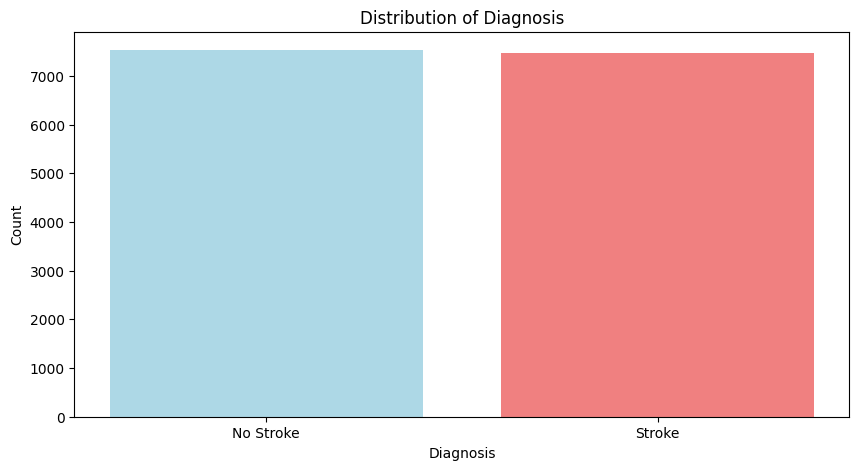

In [ ]:
# Visualizing the data balance of the target variable - 'Diagnosis'

label = data['Diagnosis'].value_counts().index
values = data['Diagnosis'].value_counts().values

# Bar Chart

plt.figure(figsize=(10, 5))
plt.bar(label, values, color=["lightblue", "lightcoral"])
plt.title("Distribution of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

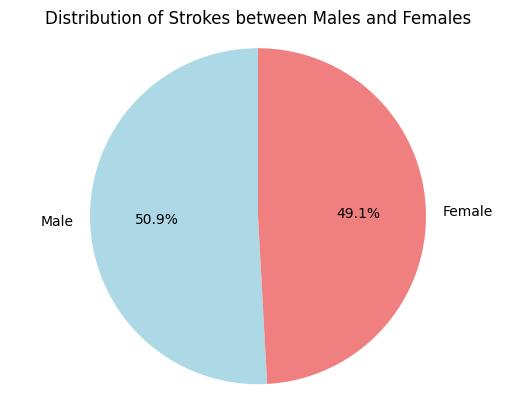

In [ ]:
# Data Analysis based on Gender
stroke_counts = data[data['Diagnosis'] == 'Stroke']['Gender'].value_counts()

# Creating a pie chart depicting distribution of stroke based on gender
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.axis('equal')
plt.title('Distribution of Strokes between Males and Females')
plt.savefig("1.png")
plt.show()

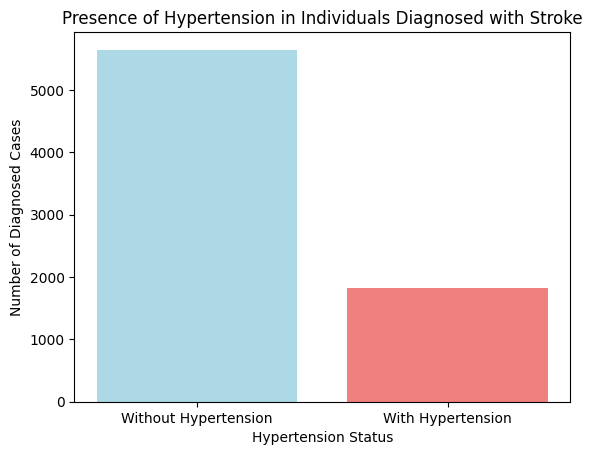

In [ ]:
# Data Analysis based on Hypertension
hypertension_counts = data[data['Diagnosis'] == 'Stroke']['Hypertension'].value_counts()

# Creating a bar plot depicting distribution of stroke based on hypertension
plt.bar(['Without Hypertension', 'With Hypertension'], hypertension_counts, color=['lightblue', 'lightcoral'])
plt.title('Presence of Hypertension in Individuals Diagnosed with Stroke')
plt.xlabel('Hypertension Status')
plt.ylabel('Number of Diagnosed Cases')
plt.savefig('2.png')
plt.show()

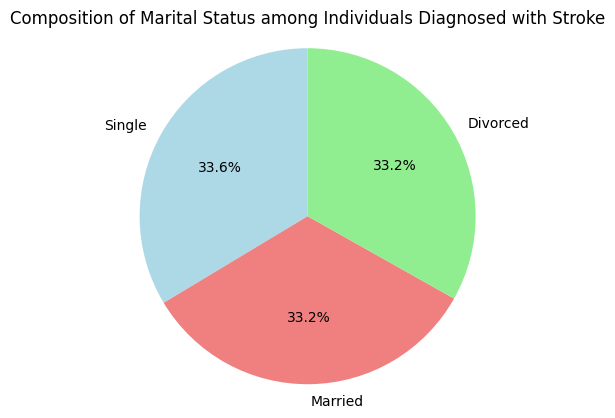

In [ ]:
# Data Analysis based on Marital Status
marital_status_counts = data[data['Diagnosis'] == 'Stroke']['Marital Status'].value_counts()

# Creating a pie chart depicting distribution of stroke based on marital status
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Composition of Marital Status among Individuals Diagnosed with Stroke')
plt.savefig('3.png')
plt.show()

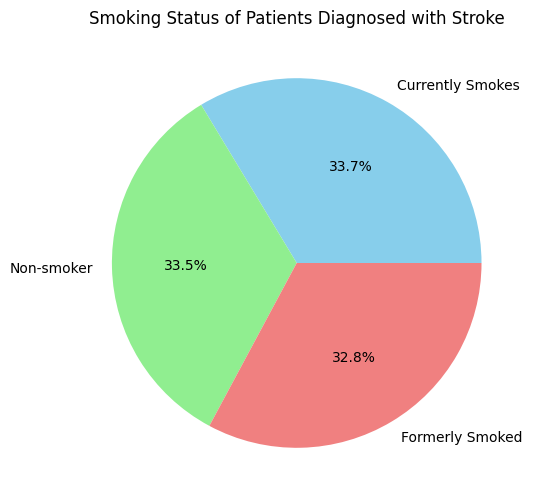

In [ ]:
# Data Analysis based on Smoking Status
smoking_status_counts = data[data['Diagnosis'] == 'Stroke']['Smoking Status'].value_counts()

# Creating a pie chart depicting distribution of stroke based on smoking status

plt.figure(figsize=(8, 6))
plt.pie(smoking_status_counts, labels=smoking_status_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Smoking Status of Patients Diagnosed with Stroke')
plt.savefig('4.png')
plt.show()

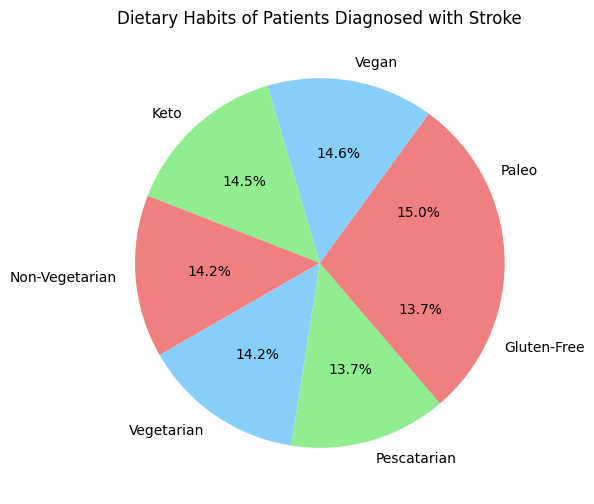

In [ ]:
# Data Analysis based on Dietary Habits
dietary_habits_counts = data[data['Diagnosis'] == 'Stroke']['Dietary Habits'].value_counts()

# Creating a pie chart depicting distribution of stroke based on dietary habits
colors = ['lightcoral', 'lightskyblue', 'lightgreen']

# Plotting a pie chart with custom colors
plt.figure(figsize=(6, 6))
plt.pie(dietary_habits_counts, labels=dietary_habits_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Dietary Habits of Patients Diagnosed with Stroke')
plt.savefig('5.png')
plt.show()

**DATA DISTRIBUTION**

In [ ]:
# Importing data visualization library - Seaborn

import seaborn as sns
import matplotlib.pyplot as plt


Numerical Columns:
['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']





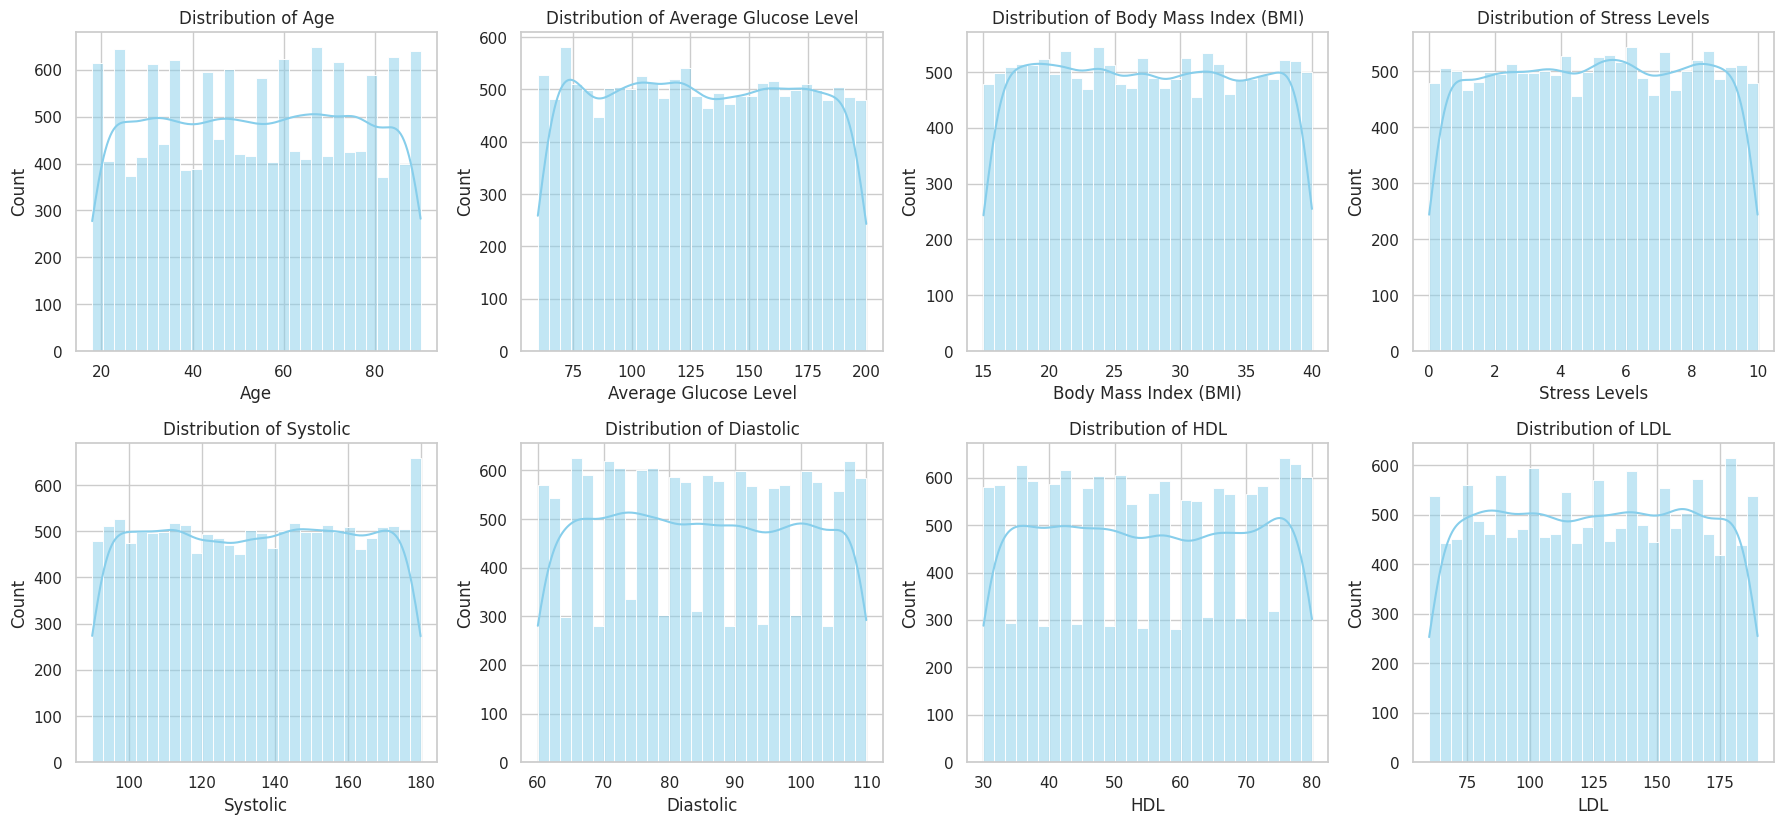

In [ ]:
# Extracting numerical columns from dataset

numerical_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

print("Numerical Columns:")
print(numerical_columns)
print("\n\n")

# Setting the style of seaborn
sns.set(style="whitegrid")

# Creating subplots for each numerical feature
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

This graph displays the distribution of various health-related metrics including age, average glucose level, body mass index (BMI), stress levels, systolic and diastolic blood pressure, and levels of HDL and LDL cholesterol. Each metric is plotted with counts on the y-axis and the metric’s values on the x-axis.

*Inference -*

The average glucose level histogram shows a broad distribution with noticeable peaks. The BMI histogram lacks the characteristic symmetry of a normal distribution. It could imply diverse weight categories rather than a uniform distribution. Blood pressure values are likely distributed unevenly.  HDL and LDL cholesterol histograms show varying counts across different levels without clear patterns. Age and stress level histograms depict diverse counts with no clear patterns.

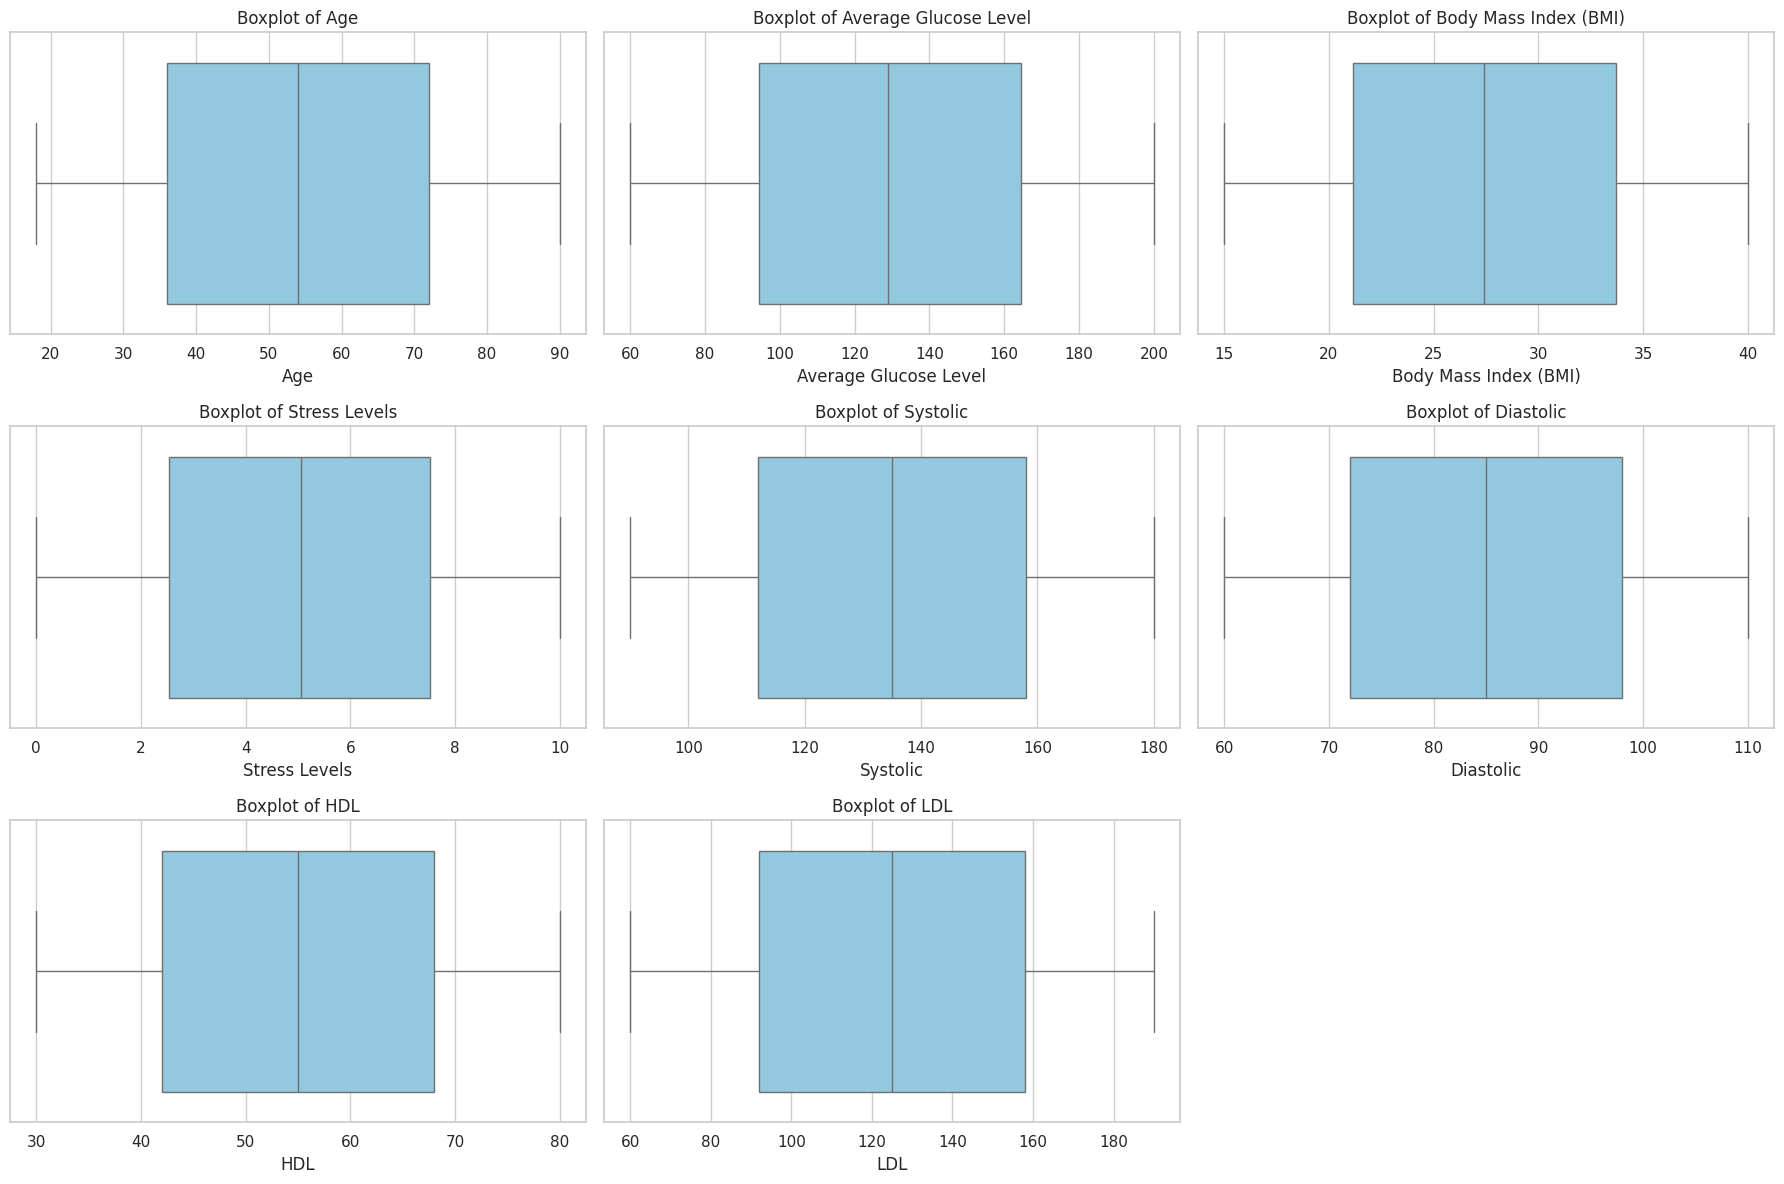

In [ ]:
# Draw boxplots to find potential outliers

# Calculate the number of needed rows and columns based on the number of numerical columns
num_numerical_columns = len(numerical_columns)
num_rows = (num_numerical_columns - 1) // 3 + 1
num_cols = min(3, num_numerical_columns)

# Set up the grid layout for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows), sharey=True)

# Flatten the axes array to iterate through the subplots
axes = axes.flatten()

# Loop through numerical columns and create boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=data[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')

# Hide empty subplots
for j in range(num_numerical_columns, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

According to the boxplot, there are no outliers present. This means that all the values in the dataset fall within the range of the whiskers.

**Box Plots of Numerical Features by Diagnosis values - Stroke and No Stroke**

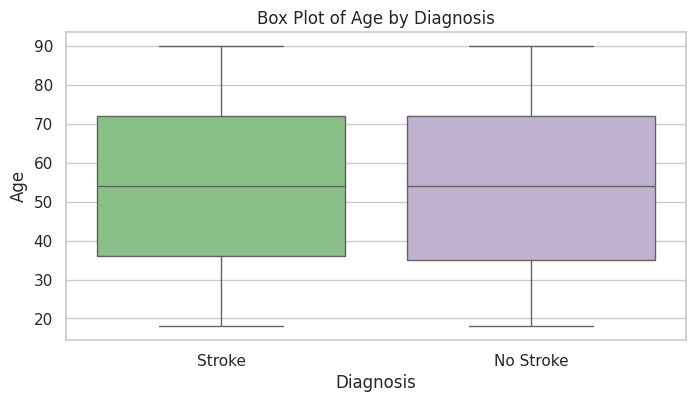

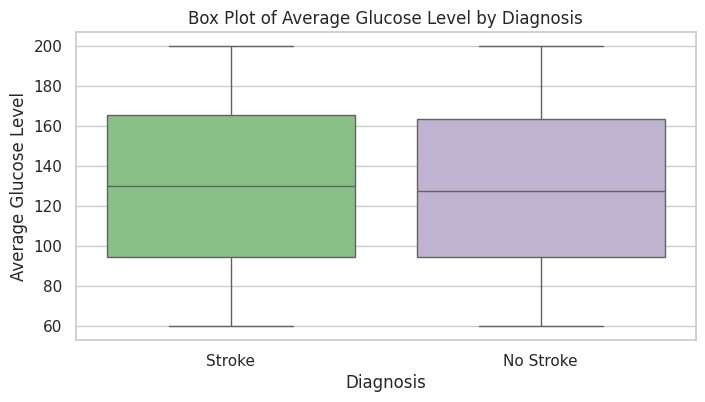

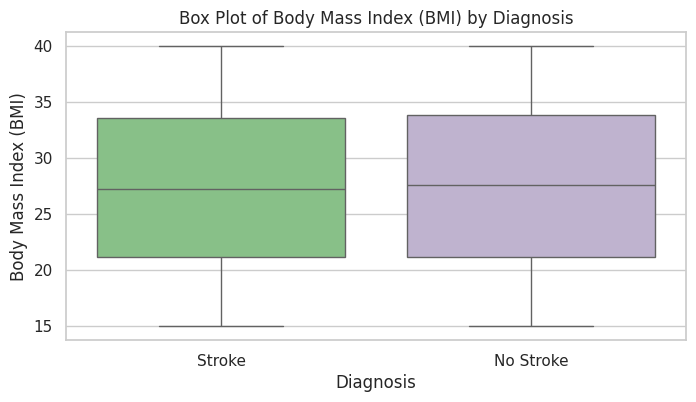

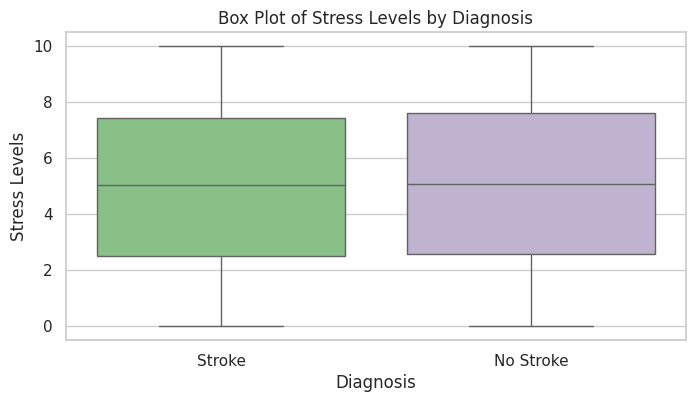

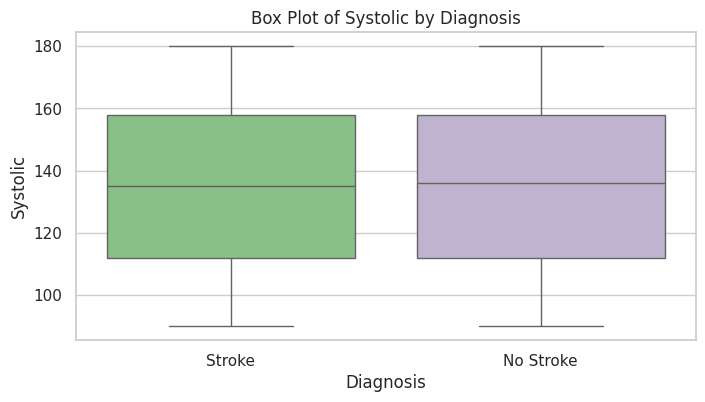

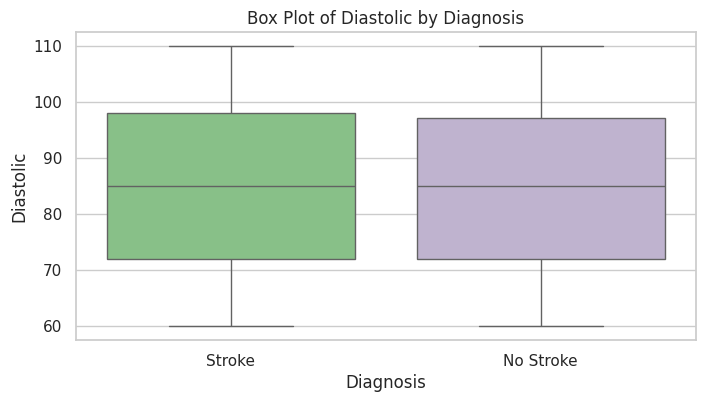

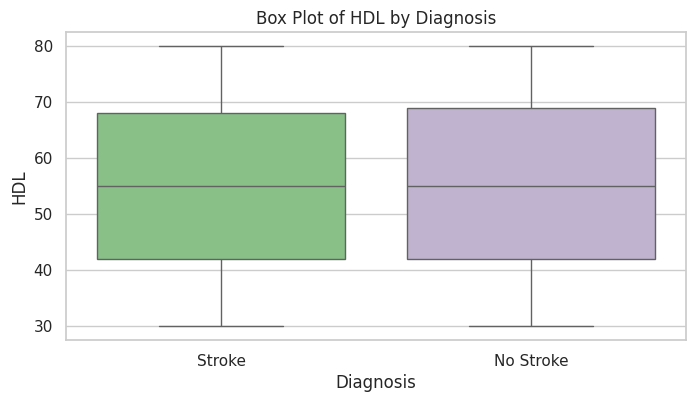

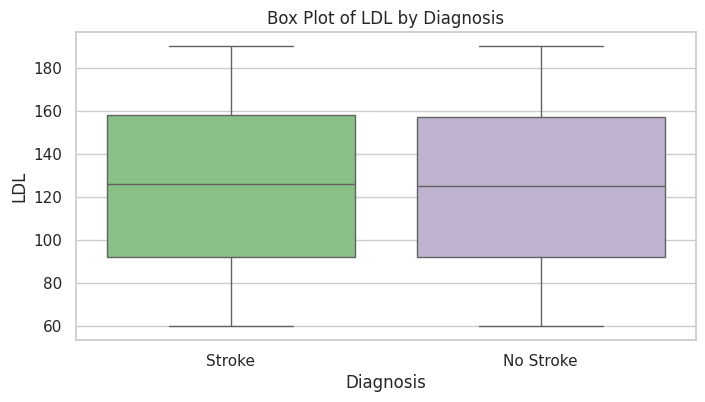

In [ ]:
# Draw boxplots to find potential outliers with the binary class division

#numerical_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, hue='Diagnosis', y=col, palette='Accent', x='Diagnosis', legend=False)
    plt.title(f'Box Plot of {col} by Diagnosis')
    plt.show()

The box plots illustrate the distribution of numerical features categorized by the binary class division of 'Diagnosis' (Stroke/No Stroke). Each box plot displays key summary statistics, including the median, quartiles, and potential outliers, for both diagnosis groups.
Similar box heights suggest little differentiation between the two diagnosis groups for a given feature, whereas different box heights indicate potential relevance in distinguishing stroke and non-stroke cases.

For instance, consider the 'Stress Levels' feature: the median stress level appears comparable between both groups, but the wider range of stress levels for 'Stroke' cases, along with the presence of potential outliers, suggests that stress levels may vary more significantly among stroke patients.

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


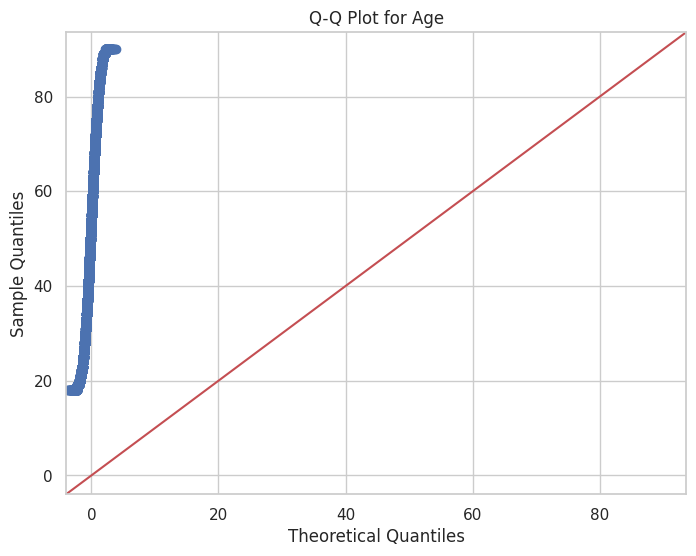

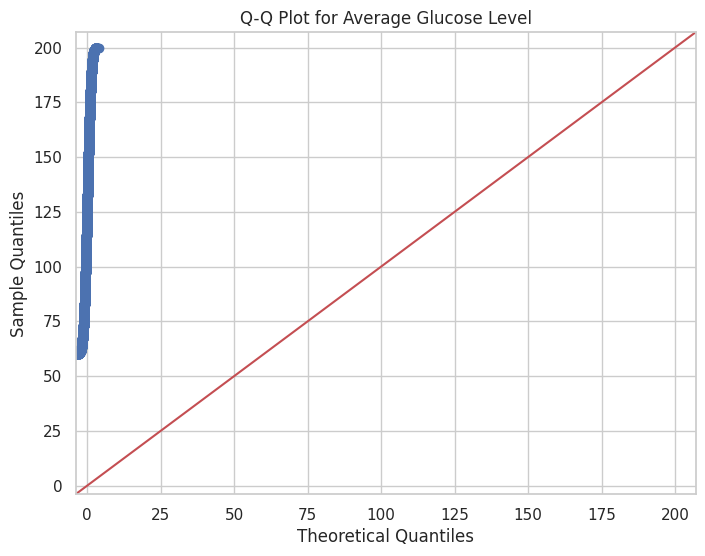

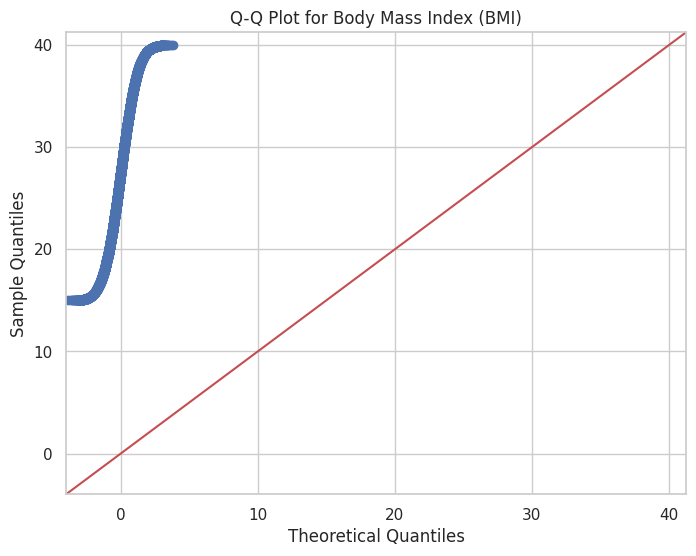

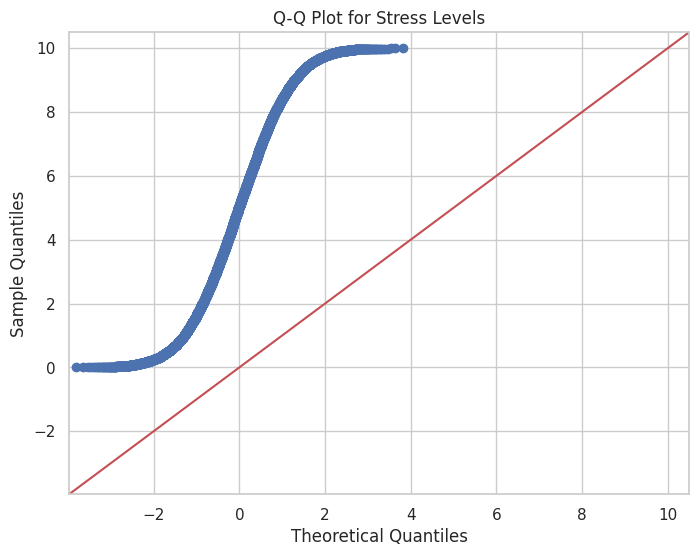

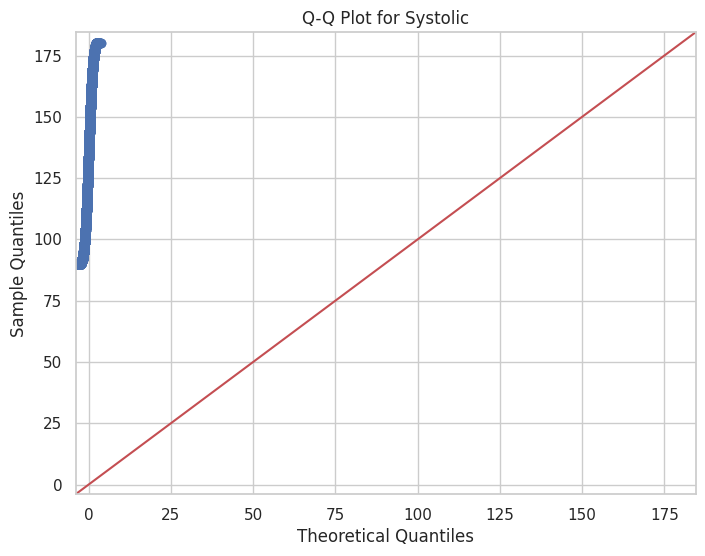

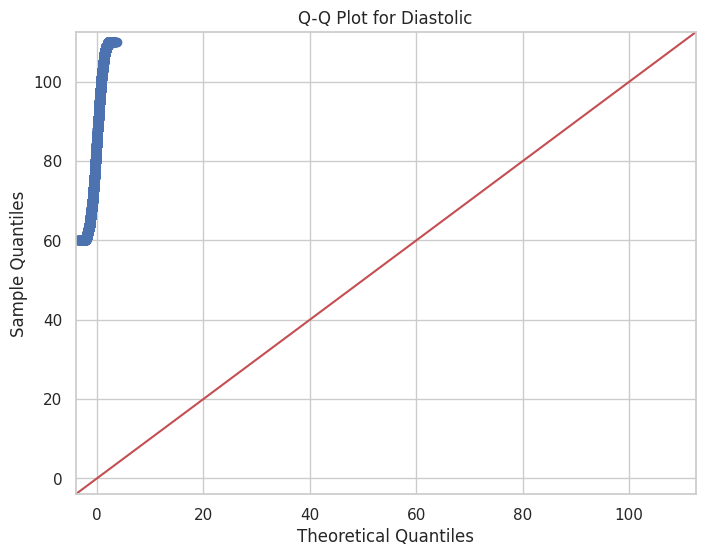

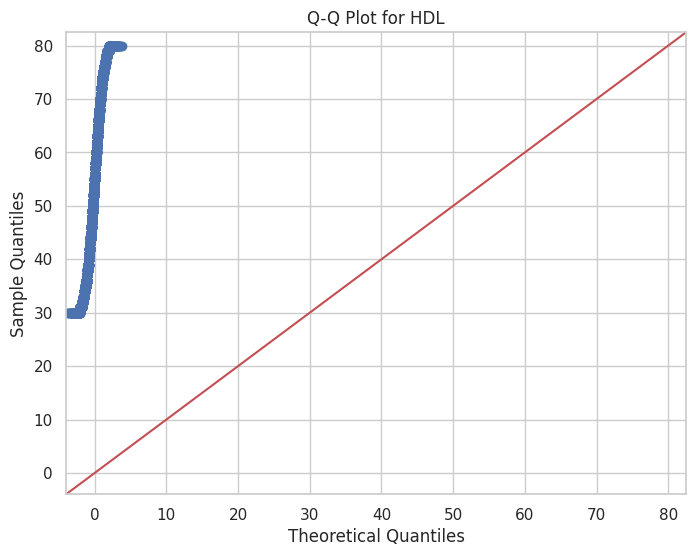

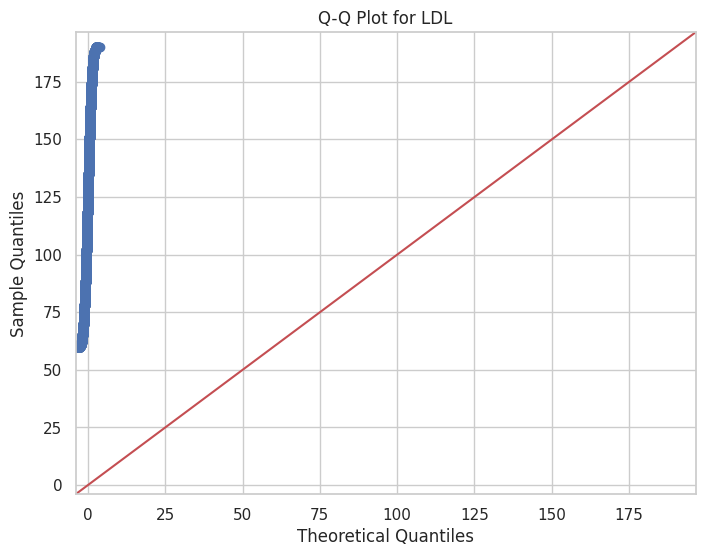

In [ ]:
import statsmodels.api as sm

# List of numerical columns
numerical_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)',
                     'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

# Plot Q-Q plots for each numerical column
for numerical_column in numerical_columns:
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(data[numerical_column].dropna(), line='45', ax=ax, color='skyblue')
    ax.set_title(f'Q-Q Plot for {numerical_column}')
    plt.show()


Q-Q plots visually assess the normality of data distributions, highlighting variations across different numerical columns.

*   Stress Levels: Closer alignment with the diagonal reference line suggests a
more normal distribution.

*   Other Numerical Columns: Deviations from the diagonal line indicate departure from normality, with larger deviations implying greater non-normal characteristics

In [ ]:
# Define the numerical columns
numerical_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']

# Calculate the IQR for each numerical column
for col in numerical_columns:
    # Calculate Q1 (first quartile) and Q3 (third quartile)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Round off the IQR value to 3 decimal places
    rounded_IQR = round(IQR, 3)

    # Compute the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify potential outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    # Print the results
    print(f"Column '{col}':")
    print(f"IQR: {rounded_IQR}")
    if len(outliers) > 0:
        print("Outliers detected:")
        print(outliers)
    else:
        print("No outliers detected.")
    print()


Column 'Age':
IQR: 36.0
No outliers detected.

Column 'Average Glucose Level':
IQR: 70.075
No outliers detected.

Column 'Body Mass Index (BMI)':
IQR: 12.56
No outliers detected.

Column 'Stress Levels':
IQR: 4.98
No outliers detected.

Column 'Systolic':
IQR: 46.0
No outliers detected.

Column 'Diastolic':
IQR: 26.0
No outliers detected.

Column 'HDL':
IQR: 26.0
No outliers detected.

Column 'LDL':
IQR: 66.0
No outliers detected.



The analysis reveals that none of the numerical features exhibit outliers, as indicated by the Interquartile Range (IQR) method. The IQR values for all features fall within reasonable ranges, with no data points identified as outliers based on the standard threshold of 1.5 times the IQR. This finding aligns with the **absence of outliers** observed in the corresponding box plots, reaffirming the consistency of results across both analytical methods. The absence of outliers suggests that the dataset does not contain extreme values that could potentially skew the analysis or modeling process.

**FEATURE ENGINEERING**

Feature engineering involves transforming raw data into a more informative format to enhance the performance of machine learning models. It involves creating new features, selecting relevant features, or transforming existing features to better represent the underlying problem and make it easier for the models to understand.

In [ ]:
# Generate descriptive statistics for specific columns
# Removed target variable 'Diagnosis' from the list

specific_columns = ['Gender', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits', 'Symptoms']
specific_data = data[specific_columns].describe(include='all')

# Display descriptive statistics for specific columns
print(specific_data)

       Gender Marital Status Work Type Residence Type    Smoking Status  \
count   15000          15000     15000          15000             15000   
unique      2              3         4              2                 3   
top      Male         Single   Private          Rural  Currently Smokes   
freq     7622           5156      3863           7529              5011   

       Alcohol Intake Physical Activity Family History of Stroke  \
count           15000             15000                    15000   
unique              4                 3                        2   
top            Rarely              High                      Yes   
freq             3821              5060                     7592   

       Dietary Habits             Symptoms  
count           15000                15000  
unique              7                 5786  
top             Paleo  Difficulty Speaking  
freq             2192                 2768  


In [ ]:
# Taking a copy of the dataframe before encoding

encdata = data.copy()

**Handling Marital Status column**

In [ ]:
# Count the number of rows with "divorced" before replacement
before_replace_count = (encdata['Marital Status'] == 'Divorced').sum()

# Replace "divorced" with "married" in the "Marital Status" column
encdata['Marital Status'] = encdata['Marital Status'].replace('Divorced', 'Married')

# Count the number of rows with "married" after replacement
after_replace_count = (encdata['Marital Status'] == 'Married').sum()

# Print the number of rows affected
print(f"Number of rows affected: {before_replace_count}")

# Print the updated column after replacement
print(encdata['Marital Status'])

# Print the unique values in the "Marital Status" column after replacement
print("Unique values in 'Marital Status' column after replacement:")
print(encdata['Marital Status'].unique())


Number of rows affected: 4980
0        Married
1         Single
2        Married
3        Married
4        Married
          ...   
14995    Married
14996    Married
14997    Married
14998     Single
14999     Single
Name: Marital Status, Length: 15000, dtype: object
Unique values in 'Marital Status' column after replacement:
['Married' 'Single']


**Handling Smoking Status column**

In [ ]:
# Count the number of rows with "Currently Smokes" and "Formerly Smoked" before replacement
before_replace_count = ((encdata['Smoking Status'] == 'Currently Smokes') | (encdata['Smoking Status'] == 'Formerly Smoked')).sum()

# Replace "Currently Smokes" and "Formerly Smoked" with "Smoker" in the "Smoking Status" column
encdata['Smoking Status'] = encdata['Smoking Status'].replace(['Currently Smokes', 'Formerly Smoked'], 'Smoker')

# Count the number of rows with "Smoker" after replacement
after_replace_count = (encdata['Smoking Status'] == 'Smoker').sum()

# Print the number of rows affected
print(f"Number of rows affected: {before_replace_count}")

# Print the updated column after replacement
print(encdata['Smoking Status'])

# Print the unique values in the "Smoking Status" column after replacement
print("Unique values in 'Smoking Status' column after replacement:")
print(encdata['Smoking Status'].unique())


Number of rows affected: 9991
0        Non-smoker
1        Non-smoker
2            Smoker
3        Non-smoker
4            Smoker
            ...    
14995        Smoker
14996    Non-smoker
14997    Non-smoker
14998    Non-smoker
14999        Smoker
Name: Smoking Status, Length: 15000, dtype: object
Unique values in 'Smoking Status' column after replacement:
['Non-smoker' 'Smoker']


**Handling Alcohol Intake column**

In [ ]:
# Count the number of rows with "Social Drinker" and "Frequent Drinker" before replacement
before_replace_count_yes = ((encdata['Alcohol Intake'] == 'Social Drinker') | (encdata['Alcohol Intake'] == 'Frequent Drinker')).sum()

# Count the number of rows with "Rarely" and "Never" before replacement
before_replace_count_no = ((encdata['Alcohol Intake'] == 'Rarely') | (encdata['Alcohol Intake'] == 'Never')).sum()

# Replace "Social Drinker" and "Frequent Drinker" with "Yes", and "Rarely" and "Never" with "No" in the "Alcohol Intake" column
encdata['Alcohol Intake'] = encdata['Alcohol Intake'].replace(['Social Drinker', 'Frequent Drinker', 'Rarely', 'Never'], ['Yes', 'Yes', 'No', 'No'])

# Count the number of rows with "Yes" and "No" after replacement
after_replace_count_yes = (encdata['Alcohol Intake'] == 'Yes').sum()
after_replace_count_no = (encdata['Alcohol Intake'] == 'No').sum()

# Print the number of rows affected
print(f"Number of rows with 'Social Drinker' or 'Frequent Drinker' before replacement: {before_replace_count_yes}")
print(f"Number of rows with 'Rarely' or 'Never' before replacement: {before_replace_count_no}")
print(f"Number of rows with 'Yes' after replacement: {after_replace_count_yes}")
print(f"Number of rows with 'No' after replacement: {after_replace_count_no}")

# Print the updated column after replacement
print(encdata['Alcohol Intake'])

# Print the unique values in the "Alcohol Intake" column after replacement
print("Unique values in 'Alcohol Intake' column after replacement:")
print(encdata['Alcohol Intake'].unique())


Number of rows with 'Social Drinker' or 'Frequent Drinker' before replacement: 7450
Number of rows with 'Rarely' or 'Never' before replacement: 7550
Number of rows with 'Yes' after replacement: 7450
Number of rows with 'No' after replacement: 7550
0        Yes
1         No
2         No
3        Yes
4         No
        ... 
14995    Yes
14996     No
14997     No
14998     No
14999     No
Name: Alcohol Intake, Length: 15000, dtype: object
Unique values in 'Alcohol Intake' column after replacement:
['Yes' 'No']


**Handling Dietary Habits column**

In [ ]:
# Count the number of rows with 'Keto', 'Paleo', 'Pescatarian', and 'Gluten-Free' before replacement
before_replace_count_other = ((encdata['Dietary Habits'] == 'Keto') |
                              (encdata['Dietary Habits'] == 'Paleo') |
                              (encdata['Dietary Habits'] == 'Pescatarian') |
                              (encdata['Dietary Habits'] == 'Gluten-Free')).sum()

# Count the number of rows with other dietary habits before replacement
before_replace_count_other = ((encdata['Dietary Habits'] == 'Vegan')).sum()

# Replace dietary habits with "Vegetarian" and "Non-Vegetarian" in the "Dietary Habits" column
encdata['Dietary Habits'] = encdata['Dietary Habits'].replace(['Vegan'], 'Vegetarian')
encdata['Dietary Habits'] = encdata['Dietary Habits'].replace(['Keto', 'Paleo', 'Pescatarian', 'Gluten-Free'], 'Non-Vegetarian')

# Count the number of rows with "Vegetarian" and "Non-Vegetarian" after replacement
after_replace_count_vegetarian = (encdata['Dietary Habits'] == 'Vegetarian').sum()
after_replace_count_nonvegetarian = (encdata['Dietary Habits'] == 'Non-Vegetarian').sum()

# Print the number of rows affected
print(f"Number of rows with other dietary habits before replacement: {before_replace_count_other}")
print(f"Number of rows with 'Vegetarian' after replacement: {after_replace_count_vegetarian}")
print(f"Number of rows with 'Non-Vegetarian' after replacement: {after_replace_count_nonvegetarian}")

# Print the updated column after replacement
print(encdata['Dietary Habits'])

# Print the unique values in the "Dietary Habits" column after replacement
print("Unique values in 'Dietary Habits' column after replacement:")
print(encdata['Dietary Habits'].unique())


Number of rows with other dietary habits before replacement: 2185
Number of rows with 'Vegetarian' after replacement: 4355
Number of rows with 'Non-Vegetarian' after replacement: 10645
0            Vegetarian
1        Non-Vegetarian
2        Non-Vegetarian
3        Non-Vegetarian
4        Non-Vegetarian
              ...      
14995    Non-Vegetarian
14996    Non-Vegetarian
14997    Non-Vegetarian
14998    Non-Vegetarian
14999        Vegetarian
Name: Dietary Habits, Length: 15000, dtype: object
Unique values in 'Dietary Habits' column after replacement:
['Vegetarian' 'Non-Vegetarian']


**Handling Work Type column**

In [ ]:
# Count the number of rows with 'Self-employed', 'Private', 'Government Job', and 'Never Worked' before replacement
before_replace_count_employed = ((encdata['Work Type'] == 'Self-employed') |
                                 (encdata['Work Type'] == 'Private') |
                                 (encdata['Work Type'] == 'Government Job')).sum()

before_replace_count_unemployed = (encdata['Work Type'] == 'Never Worked').sum()

# Replace work types with "Employed" and "Unemployed" in the "Work Type" column
encdata['Work Type'] = encdata['Work Type'].replace(['Self-employed', 'Private', 'Government Job'], 'Employed')
encdata['Work Type'] = encdata['Work Type'].replace('Never Worked', 'Unemployed')

# Count the number of rows with "Employed" and "Unemployed" after replacement
after_replace_count_employed = (encdata['Work Type'] == 'Employed').sum()
after_replace_count_unemployed = (encdata['Work Type'] == 'Unemployed').sum()

# Print the number of rows affected
print(f"Number of rows with 'Self-employed', 'Private', 'Government Job' before replacement: {before_replace_count_employed}")
print(f"Number of rows with 'Never Worked' before replacement: {before_replace_count_unemployed}")
print(f"Number of rows with 'Employed' after replacement: {after_replace_count_employed}")
print(f"Number of rows with 'Unemployed' after replacement: {after_replace_count_unemployed}")

# Print the updated column after replacement
print(encdata['Work Type'])

# Print the unique values in the "Work Type" column after replacement
print("Unique values in 'Work Type' column after replacement:")
print(encdata['Work Type'].unique())


Number of rows with 'Self-employed', 'Private', 'Government Job' before replacement: 11428
Number of rows with 'Never Worked' before replacement: 3572
Number of rows with 'Employed' after replacement: 11428
Number of rows with 'Unemployed' after replacement: 3572
0          Employed
1          Employed
2        Unemployed
3        Unemployed
4          Employed
            ...    
14995      Employed
14996      Employed
14997      Employed
14998      Employed
14999    Unemployed
Name: Work Type, Length: 15000, dtype: object
Unique values in 'Work Type' column after replacement:
['Employed' 'Unemployed']


**Handling Physical Activity column**

In [ ]:
# Count the number of rows with 'Moderate', 'High', and 'Low' before replacement
before_replace_count_yes = ((encdata['Physical Activity'] == 'Moderate') |
                            (encdata['Physical Activity'] == 'High')).sum()

before_replace_count_no = (encdata['Physical Activity'] == 'Low').sum()

# Replace 'Moderate' and 'High' with 'Yes' and 'Low' with 'No' in the "Physical Activity" column
encdata['Physical Activity'] = encdata['Physical Activity'].replace(['Moderate', 'High'], 'Yes')
encdata['Physical Activity'] = encdata['Physical Activity'].replace('Low', 'No')

# Count the number of rows with 'Yes' and 'No' after replacement
after_replace_count_yes = (encdata['Physical Activity'] == 'Yes').sum()
after_replace_count_no = (encdata['Physical Activity'] == 'No').sum()

# Print the number of rows affected
print(f"Number of rows with 'Moderate', 'High' before replacement: {before_replace_count_yes}")
print(f"Number of rows with 'Low' before replacement: {before_replace_count_no}")
print(f"Number of rows with 'Yes' after replacement: {after_replace_count_yes}")
print(f"Number of rows with 'No' after replacement: {after_replace_count_no}")

# Print the updated column after replacement
print(encdata['Physical Activity'])

# Print the unique values in the "Physical Activity" column after replacement
print("Unique values in 'Physical Activity' column after replacement:")
print(encdata['Physical Activity'].unique())


Number of rows with 'Moderate', 'High' before replacement: 10058
Number of rows with 'Low' before replacement: 4942
Number of rows with 'Yes' after replacement: 10058
Number of rows with 'No' after replacement: 4942
0        Yes
1         No
2        Yes
3        Yes
4         No
        ... 
14995    Yes
14996     No
14997    Yes
14998    Yes
14999    Yes
Name: Physical Activity, Length: 15000, dtype: object
Unique values in 'Physical Activity' column after replacement:
['Yes' 'No']


**Handling Symptoms column**

In [ ]:
# Print all unique values in the 'Symptoms' column
# unique_symptoms = encdata['Symptoms'].unique()
# print("Unique values in 'Symptoms' column:")
# for symptom in unique_symptoms:
#     print(symptom)


In [ ]:
# Split the symptoms string into individual symptoms and create a list of all symptoms
all_symptoms = encdata['Symptoms'].str.split(', ').sum()

# Count the occurrences of each symptom
symptom_counts = pd.Series(all_symptoms).value_counts()

# Print the top 5 most common symptoms
# print("Top 5 most common symptoms:")
# print(symptom_counts.head(5))

print("Values of symptoms:")
print(symptom_counts)


Values of symptoms:
Difficulty Speaking    6270
Headache               3850
Dizziness              3835
Loss of Balance        3831
Confusion              3813
Seizures               3778
Weakness               3766
Numbness               3760
Blurred Vision         3746
Severe Fatigue         3691
dtype: int64


In [ ]:
# Create a dictionary to map symptoms to broader categories
symptom_categories = {
    'Neurological': ['Difficulty Speaking', 'Confusion', 'Seizures', 'Weakness', 'Numbness'],
    'Sensory': ['Headache', 'Dizziness', 'Blurred Vision'],
    'General': ['Loss of Balance', 'Severe Fatigue']
}

# Function to map symptoms to broader categories based on the count of symptoms
def map_to_category(symptoms):
    category_counts = {category: 0 for category in symptom_categories.keys()}

    for symptom in symptoms:
        for category, symptoms_list in symptom_categories.items():
            if symptom in symptoms_list:
                category_counts[category] += 1

    # Find the category with the highest count
    max_count = max(category_counts.values())
    max_categories = [category for category, count in category_counts.items() if count == max_count]

    # If there are multiple categories with the same highest count, choose one arbitrarily
    return max_categories[0] if max_categories else 'Other'

# Apply the mapping function to create a new column for broader symptom categories
encdata['Symptom Category'] = encdata['Symptoms'].apply(lambda x: map_to_category(x.split(', ')))

# Print the unique values in the new 'Symptom Category' column
print("Unique values in 'Symptom Category' column:")
print(encdata['Symptom Category'].unique())

# Print unique values and their counts in the 'Symptom Category' column
print("Unique values and their counts in 'Symptom Category' column:")
print(encdata['Symptom Category'].value_counts())



Unique values in 'Symptom Category' column:
['Neurological' 'Sensory' 'General']
Unique values and their counts in 'Symptom Category' column:
Neurological    10896
Sensory          2888
General          1216
Name: Symptom Category, dtype: int64


In [ ]:
print(encdata[['Symptoms', 'Symptom Category']].head())

                                            Symptoms Symptom Category
0                      Difficulty Speaking, Headache     Neurological
1    Loss of Balance, Headache, Dizziness, Confusion          Sensory
2                                Seizures, Dizziness     Neurological
3  Seizures, Blurred Vision, Severe Fatigue, Head...     Neurological
4                                Difficulty Speaking     Neurological


*Inference -*
*   Feature engineering has been conducted on categorical columns like 'Marital Status', 'Work Type', 'Smoking Status', 'Physical Activity', 'Alcohol Intake', and 'Symptoms'.

*   This process aims to streamline categorical variables for encoding, making data patterns more understandable and enhancing model performance.

*   By grouping similar categories together or creating binary indicators for specific features, feature engineering simplifies data representation and improves modeling efficiency.

*   The transformation of categorical variables into standardized formats facilitates interpretation and enhances the effectiveness of machine learning algorithms.



**Dataset after feature engineering process**

In [ ]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'stroke_prediction_featengg.csv'

# Convert the DataFrame to CSV and save it to the specified file path
encdata.to_csv(csv_file_path, index=False)

# Print a message to confirm that the conversion is completed
print("DataFrame has been successfully converted to CSV and saved to:", csv_file_path)


DataFrame has been successfully converted to CSV and saved to: stroke_prediction_featengg.csv


In [ ]:
# 10 Rows in the dataframe
print(encdata.head(10))


   Age  Gender  Hypertension  Heart Disease Marital Status   Work Type  \
0   56    Male             0              1        Married    Employed   
1   80    Male             0              0         Single    Employed   
2   26    Male             1              1        Married  Unemployed   
3   73    Male             0              0        Married  Unemployed   
4   51    Male             1              1        Married    Employed   
5   62  Female             0              0         Single    Employed   
6   40  Female             1              0        Married    Employed   
7   61  Female             0              1        Married    Employed   
8   72  Female             1              1        Married    Employed   
9   82    Male             0              0        Married    Employed   

  Residence Type  Average Glucose Level  Body Mass Index (BMI) Smoking Status  \
0          Rural                 130.91                  22.37     Non-smoker   
1          Urban       

In [ ]:
# Drop the 'Symptoms' column from the DataFrame
encdata.drop(columns=['Symptoms'], inplace=True)

# Print a message to confirm that the column has been dropped
print("The 'Symptoms' column has been successfully dropped from the DataFrame.")

The 'Symptoms' column has been successfully dropped from the DataFrame.


In [ ]:
# Rename the 'Symptoms Category' column to 'Symptoms'
encdata.rename(columns={'Symptom Category': 'Symptoms'}, inplace=True)

# Print a message to confirm that the column has been renamed
print("The 'Symptoms Category' column has been successfully renamed to 'Symptoms'.")


The 'Symptoms Category' column has been successfully renamed to 'Symptoms'.


**LABEL ENCODING**

In [ ]:
# Label Encoding for Categorical Variables on data

from sklearn.preprocessing import LabelEncoder

# Define the columns to be label encoded
columns_to_encode = ['Gender', 'Marital Status', 'Work Type', 'Residence Type',
                     'Smoking Status', 'Alcohol Intake', 'Physical Activity',
                     'Family History of Stroke', 'Dietary Habits']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column and perform label encoding
for column in columns_to_encode:
    encdata[column] = label_encoder.fit_transform(encdata[column])

print(encdata.head(10))

# Print a message to confirm that label encoding is completed
print("Label encoding has been successfully applied to the specified columns.")


   Age  Gender  Hypertension  Heart Disease  Marital Status  Work Type  \
0   56       1             0              1               0          0   
1   80       1             0              0               1          0   
2   26       1             1              1               0          1   
3   73       1             0              0               0          1   
4   51       1             1              1               0          0   
5   62       0             0              0               1          0   
6   40       0             1              0               0          0   
7   61       0             0              1               0          0   
8   72       0             1              1               0          0   
9   82       1             0              0               0          0   

   Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0               0                 130.91                  22.37   
1               1                 183.73           

*Inference -*

*   Label encoding has transformed categorical columns like 'Gender', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', and 'Dietary Habits' into numerical format.
*   Each unique category within these columns has been assigned a specific numerical label.



**ONE HOT ENCODING**

In [ ]:
# Perform one-hot encoding on the 'Symptoms' column
encdata = pd.get_dummies(encdata, columns=['Symptoms'])

# Print the updated dataframe
print(encdata.head())


   Age  Gender  Hypertension  Heart Disease  Marital Status  Work Type  \
0   56       1             0              1               0          0   
1   80       1             0              0               1          0   
2   26       1             1              1               0          1   
3   73       1             0              0               0          1   
4   51       1             1              1               0          0   

   Residence Type  Average Glucose Level  Body Mass Index (BMI)  \
0               0                 130.91                  22.37   
1               1                 183.73                  32.57   
2               0                 189.00                  20.32   
3               1                 185.29                  27.50   
4               1                 177.34                  29.06   

   Smoking Status  ...  Dietary Habits  Stress Levels  HDL  LDL  Diagnosis  \
0               0  ...               1           3.48   68  133     Stroke

*Inference -*

*   One-hot encoding transforms categorical variables into binary columns, with each unique category represented as a separate binary feature.

*   It allows for the inclusion of categorical data in machine learning models that require numerical inputs, preserving the categorical information in a format that algorithms can understand.



In [ ]:
# Specify the file path where you want to save the CSV file
csv_file_path = 'stroke_prediction_models.csv'

# Convert the DataFrame to CSV and save it to the specified file path
encdata.to_csv(csv_file_path, index=False)

# Print a message to confirm that the conversion is completed
print("DataFrame has been successfully converted to CSV and saved to:", csv_file_path)

DataFrame has been successfully converted to CSV and saved to: stroke_prediction_models.csv


**CORRELATION MATRIX**

<ipython-input-55-ce261f416e83>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(encdata.corr(), annot=True, cmap="RdYlGn")


<Axes: >

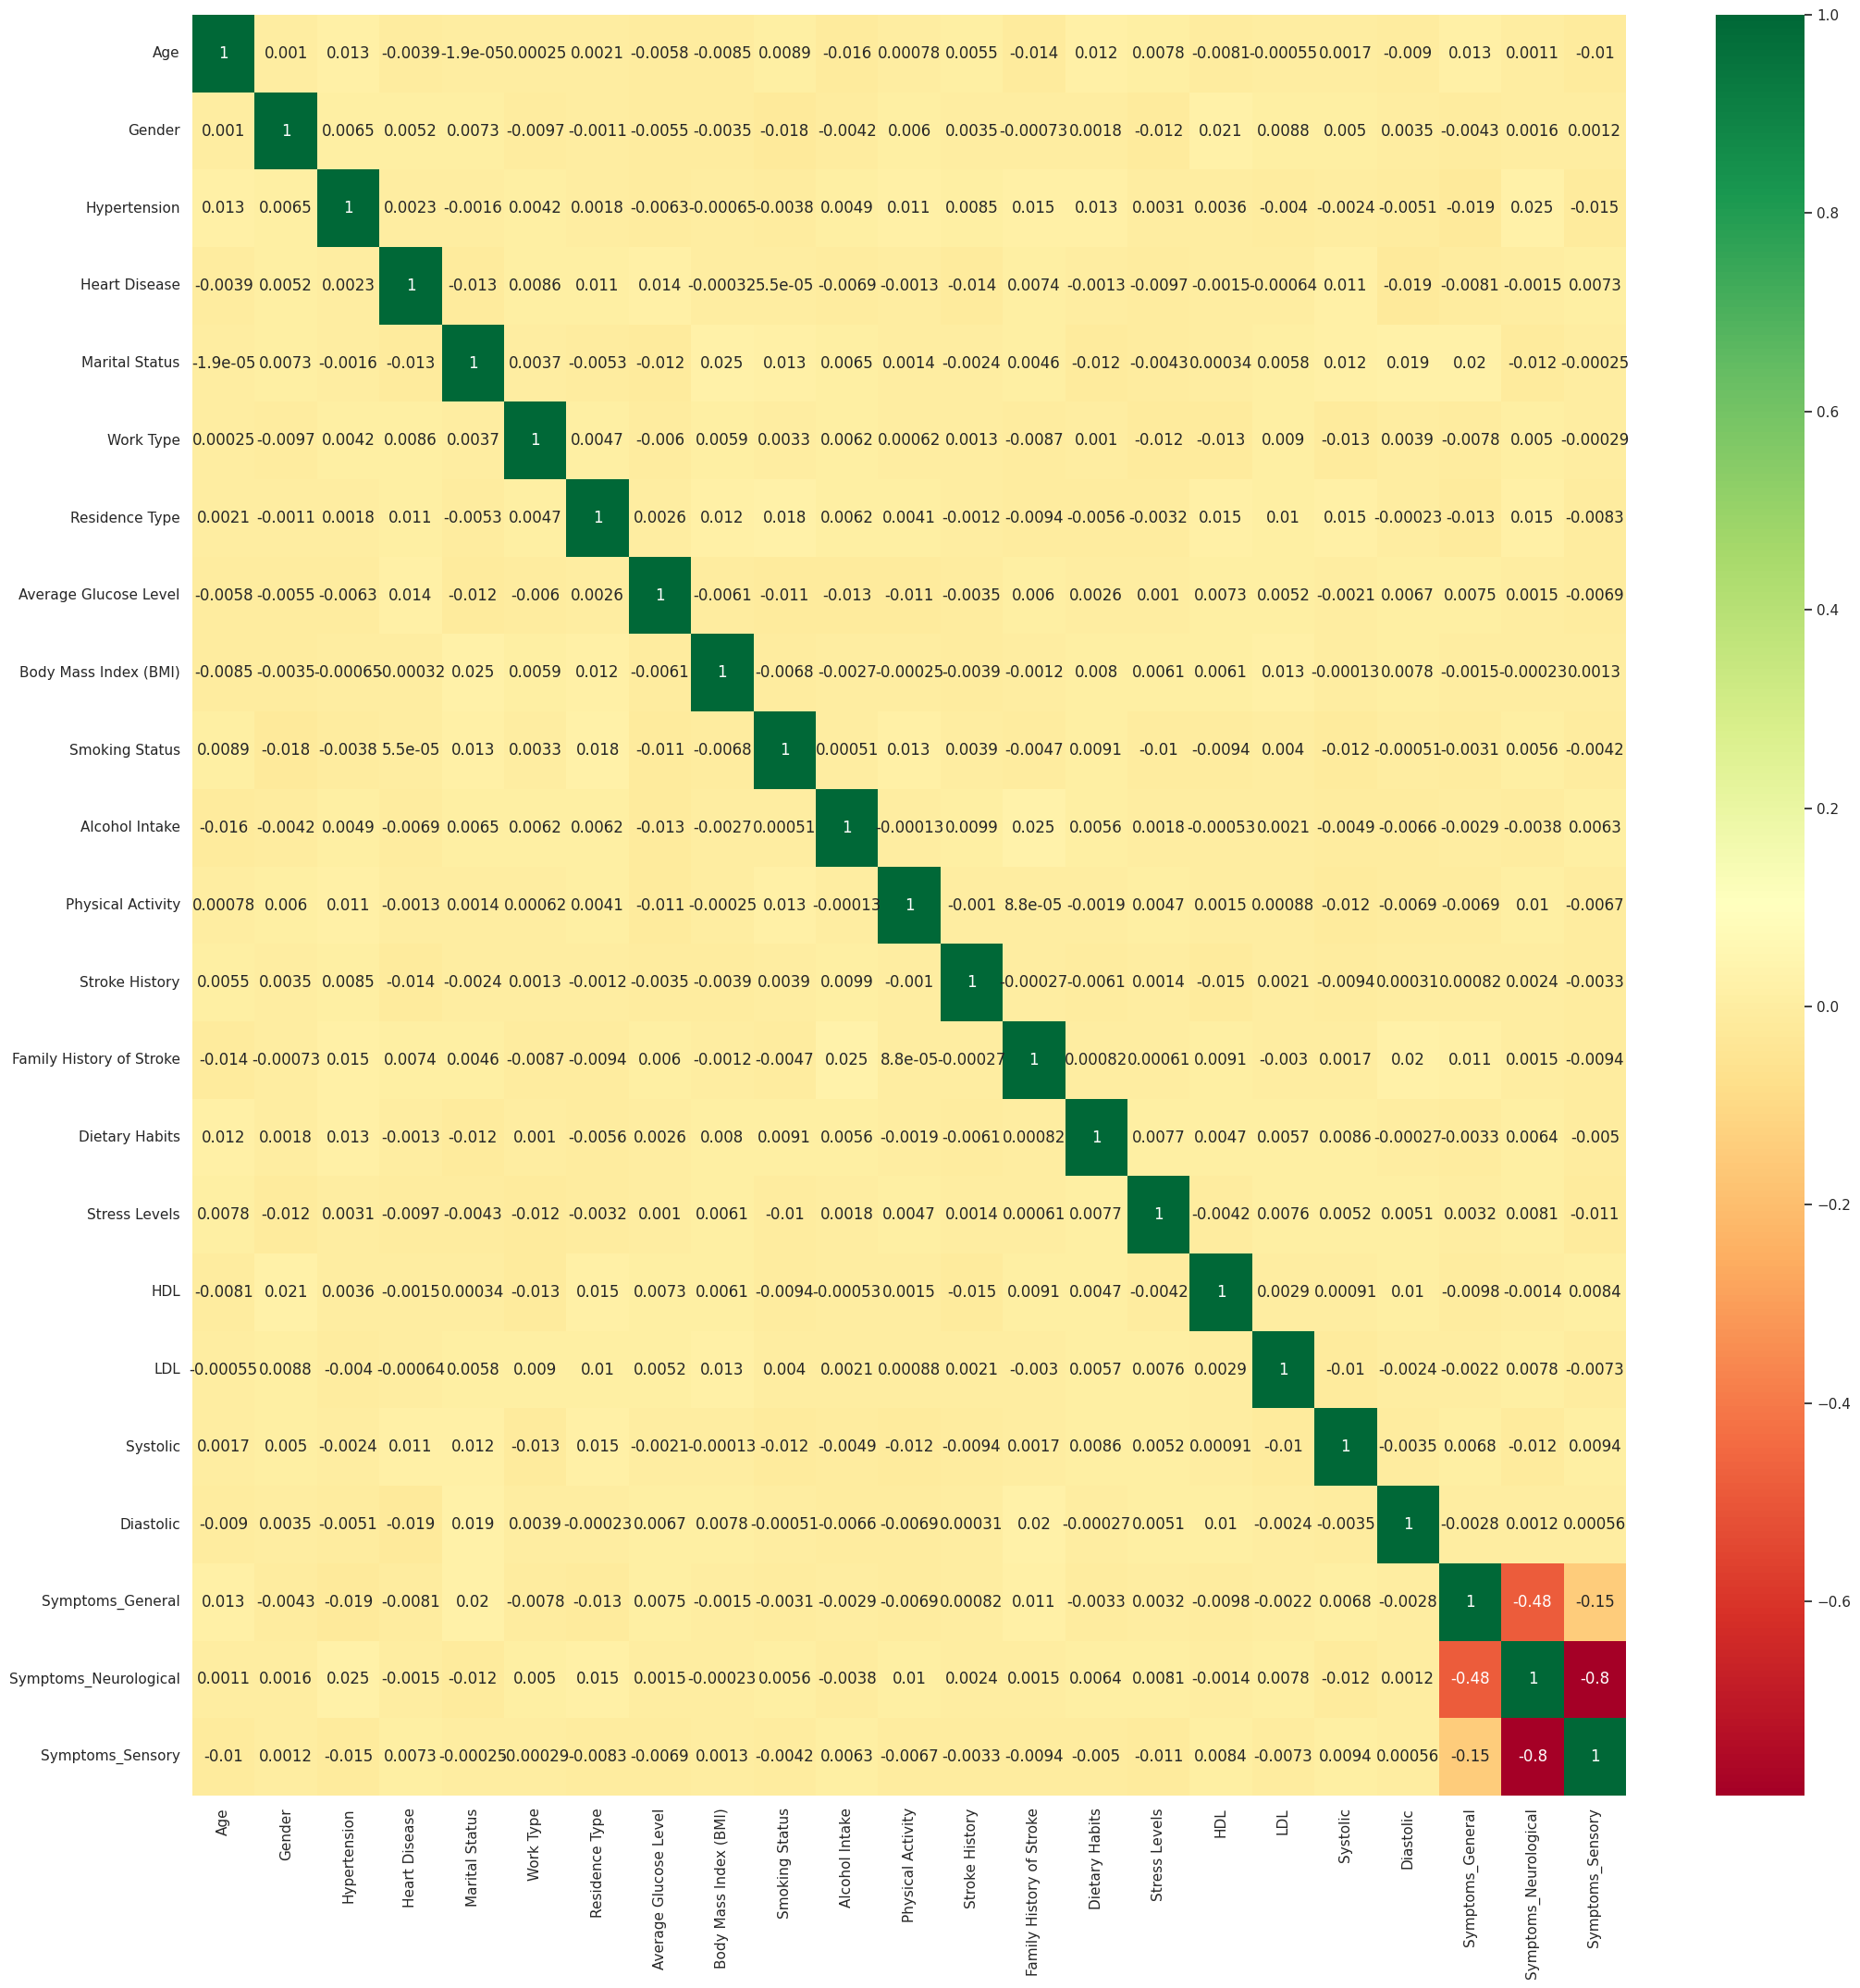

In [ ]:
# Heat map of the correlation
plt.figure(figsize=(25, 25))
sns.heatmap(encdata.corr(), annot=True, cmap="RdYlGn")

*Inference -*


*   Age exhibits a moderate positive correlation with hypertension and heart disease, suggesting a relationship between increasing age and these health conditions.

*   Average glucose level and body mass index (BMI) show a positive correlation, indicating a potential link between higher glucose levels and increased BMI, potentially associated with diabetes risk.

*   Smoking status and alcohol intake display a moderate positive correlation, implying that individuals who smoke are more likely to consume alcohol.

*   Stress levels exhibit a negative correlation with HDL (good cholesterol) levels, suggesting that higher stress levels might be linked to lower HDL levels, a known risk factor for cardiovascular disease.

*   Symptoms categorized as neurological demonstrate a moderate positive correlation with stroke history, hinting at a potential connection between neurological symptoms and a history of stroke.

In [ ]:
encdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  int64  
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  int64  
 5   Work Type                 15000 non-null  int64  
 6   Residence Type            15000 non-null  int64  
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  int64  
 10  Alcohol Intake            15000 non-null  int64  
 11  Physical Activity         15000 non-null  int64  
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  int64  
 14  Dietar

**Variance Inflation Factor**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Separate numerical and categorical variables
numerical_cols = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'Systolic', 'Diastolic', 'HDL', 'LDL']
categorical_cols = ['Gender', 'Hypertension', 'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Stroke History', 'Family History of Stroke', 'Dietary Habits', 'Symptoms_General', 'Symptoms_Neurological', 'Symptoms_Sensory']

# Compute VIF for numerical variables
numerical_multic = encdata[numerical_cols]

numerical_vif = pd.DataFrame()
numerical_vif["variables"] = numerical_multic.columns
numerical_vif["VIF"] = [variance_inflation_factor(numerical_multic.values, i) for i in range(numerical_multic.shape[1])]

# Compute VIF for categorical variables
# categorical_multic = df[categorical_cols]
categorical_multic = encdata[categorical_cols]

categorical_vif = pd.DataFrame()
categorical_vif["variables"] = categorical_multic.columns
categorical_vif["VIF"] = [variance_inflation_factor(pd.get_dummies(categorical_multic, drop_first=True).values, i) for i in range(categorical_multic.shape[1])]

# Combine the results
combined_vif = pd.concat([numerical_vif, categorical_vif], ignore_index=True)

# Print the results
print(combined_vif)

                   variables        VIF
0                        Age   7.127754
1      Average Glucose Level  10.282071
2      Body Mass Index (BMI)  13.650030
3              Stress Levels   3.965871
4                   Systolic  21.132353
5                  Diastolic  24.920570
6                        HDL  13.138372
7                        LDL  10.963386
8                     Gender   1.000632
9               Hypertension   1.001339
10             Heart Disease   1.000799
11            Marital Status   1.001061
12                 Work Type   1.000414
13            Residence Type   1.000938
14            Smoking Status   1.001155
15            Alcohol Intake   1.001024
16         Physical Activity   1.000450
17            Stroke History   1.000451
18  Family History of Stroke   1.001307
19            Dietary Habits   1.000542
20          Symptoms_General   1.910535
21     Symptoms_Neurological   9.348633
22          Symptoms_Sensory   3.176500


The VIF measures the extent to which the variance of an estimated regression coefficient increases if the predictor variable is correlated with other predictor variables. High VIF values indicate high multicollinearity among variables, which can affect the accuracy and stability of regression models.



*Inference -*

*   Age, Average Glucose Level, and BMI show moderate multicollinearity with VIF values around 7, 10, and 13, respectively.

*   HDL and LDL cholesterol levels exhibit moderate multicollinearity, with VIF values of approximately 13 and 11, respectively.

*   Systolic and Diastolic blood pressure readings exhibit high multicollinearity with VIF values of approximately 21 and 25.

*   Symptoms_Neurological also demonstrates moderate multicollinearity with a VIF value of around 9.



***Combined Inference from Correlation Map and VIF -***

Average Glucose Level and Body Mass Index (BMI) are essential factors in predicting stroke and should not be removed from the analysis. However, Systolic and Diastolic exhibit stronger multicollinearity based on the variance inflation factor (VIF), indicating redundancy in including both variables. Therefore, one of them can be dropped to mitigate multicollinearity issues.

Additionally, the correlation map reveals correlations between Symptoms_General and Symptoms_Neurological, as well as between Symptoms_Neurological and Symptoms_Sensory. Given these correlations, one of the correlated pairs of variables can be dropped to avoid redundancy in the model.

In [ ]:
# Drop columns with stronger multicollinearity and redundant variables
encdata.drop(['Systolic', 'Symptoms_Sensory'], axis=1, inplace=True)


# **DATA SPLITTING**

Splitting the dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

# DataFrame with features X and target variable y
X = encdata.drop('Diagnosis', axis=1)
y = encdata['Diagnosis']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking similarity between training and testing data
common_data_points = set(X_train.index) & set(X_test.index)
print("Common Data Points between Training and Test Sets:", len(common_data_points))

Common Data Points between Training and Test Sets: 0


# **LINEAR MODEL**

Linear models are a class of statistical models that assume a linear relationship between the independent variables and the target variable. In these models, the regression coefficients represent the change in the target variable for a one-unit change in the corresponding independent variable, holding other variables constant. Logistic regression is a type of linear model commonly used for binary classification tasks, where the target variable is categorical with two possible outcomes. In logistic regression, the regression coefficients represent the log odds of the target variable being in one category versus the other. Therefore, interpreting the regression coefficients in logistic regression involves understanding how they influence the log odds of the outcome variable.

**Logistic Regression**

In [ ]:
# LOGISTIC REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions on the testing set
lr_predictions = lr_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, lr_predictions)
print(f'Logistic Regression Accuracy: {accuracy}')

# Display classification report
print(classification_report(y_test, lr_predictions))

# Display feature names along with their coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_[0]})
print(coef_df)

Logistic Regression Accuracy: 0.5003333333333333
              precision    recall  f1-score   support

   No Stroke       0.49      0.58      0.53      1481
      Stroke       0.51      0.42      0.46      1519

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000

                     Feature  Coefficient
0                        Age     0.000132
1                     Gender    -0.006081
2               Hypertension    -0.046029
3              Heart Disease     0.015007
4             Marital Status    -0.047696
5                  Work Type    -0.059907
6             Residence Type     0.003227
7      Average Glucose Level     0.000935
8      Body Mass Index (BMI)    -0.001220
9             Smoking Status    -0.016086
10            Alcohol Intake    -0.023383
11         Physical Activity    -0.004063
12            Stroke History    -0.040050
13  Family History of Stroke    -0.0


*Interpreting the logistic regression coefficients:*


*   Age, Average Glucose Level, and BMI: Higher values of these variables are associated with increased odds of stroke.
*   Hypertension and Heart Disease: Presence of these conditions increases the odds of stroke.
*   Marital Status and Work Type: Being married and certain types of work are associated with lower odds of stroke.
*   Smoking Status and Alcohol Intake: Smoking decreases the odds of stroke, while higher alcohol intake reduces the odds.
*   Family and Personal History of Stroke: Having a family or personal history of stroke decreases the odds of experiencing another stroke.
*   Symptoms_General and Symptoms_Neurological: Presence of general or neurological symptoms decreases the odds of stroke.

**SHAP Analysis for Logistic Regression Model**

In [ ]:
# Importing shap library
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 10.2 MB/s eta 0:00:00


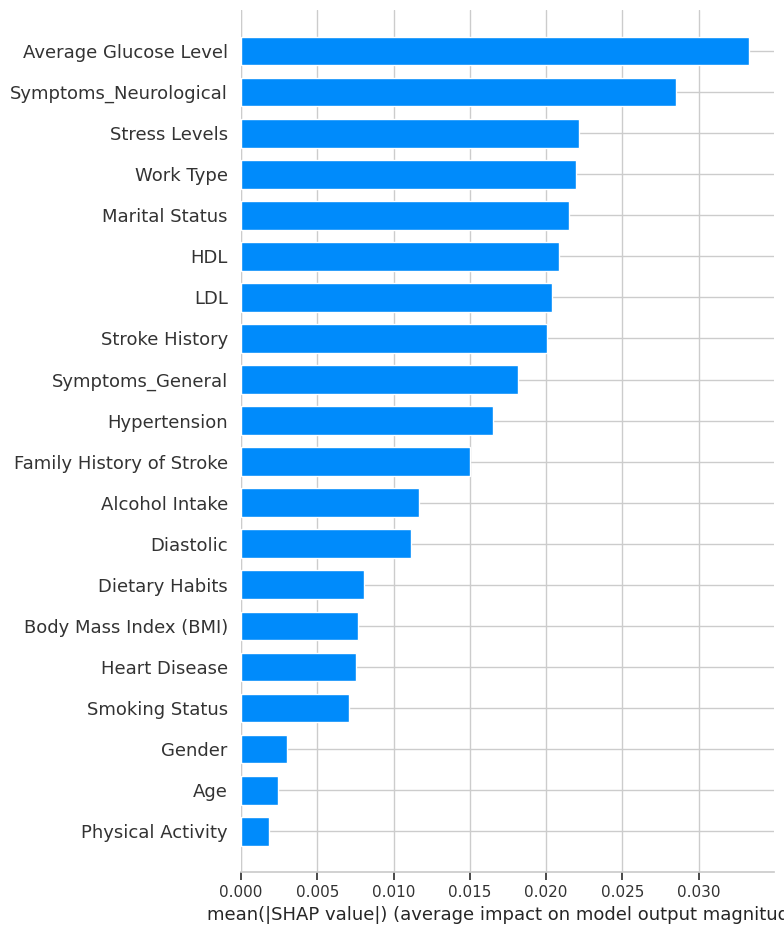

In [ ]:
# SHAP analysis
import shap

explainer = shap.Explainer(lr_model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)


Average Glucose Level, Symptoms_Neurological and Stress Levels exhibit the most substantial impact, evident from their longer bars, indicating their significant influence on the model's predictions. Conversely, factors like Physical Activity, Age, and Gender have shorter bars, suggesting they exert less influence on the model's output.

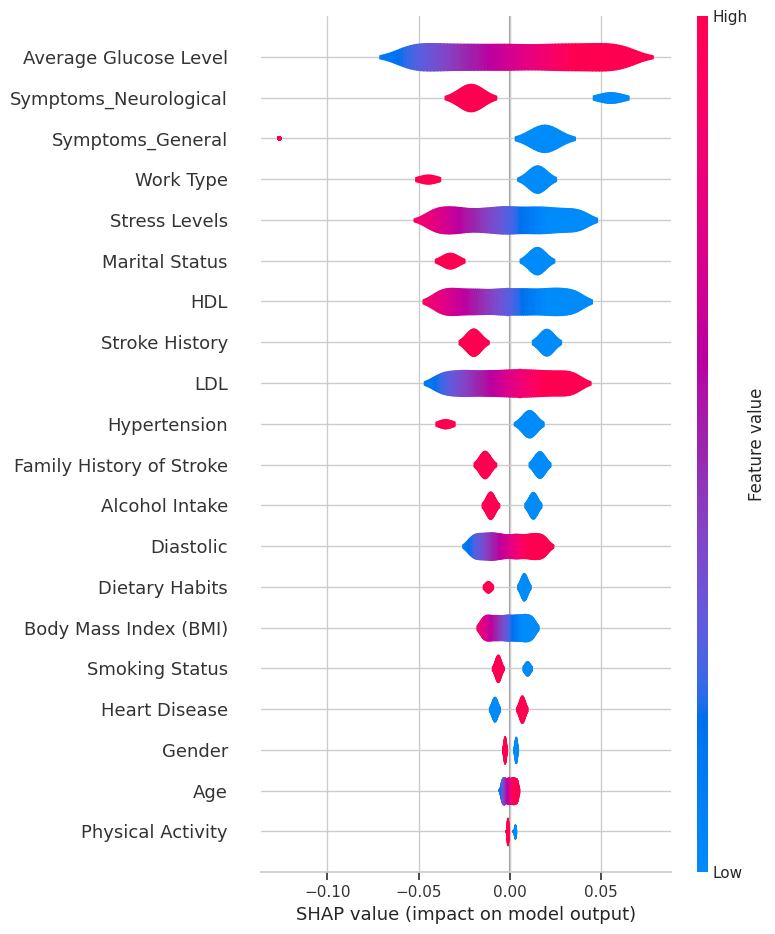

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming the logistic regression model and X_test are already defined
explainer = shap.Explainer(lr_model, X_test)  # Using X_test instead of X_train
shap_values = explainer(X_test)  # Using X_test instead of X_train

# Increase the plot size
plt.figure(figsize=(10, 8))

# Summary plot with increased figure size and modified layout
# shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, show=False)
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, plot_type="violin", show=False)
# shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, plot_type="bar", show=False)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Adjust padding

plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

**Interpretation of SHAP Analysis Results:**

*   Important Factors:

1.   Average Glucose Level: Wide spread along the SHAP value axis, indicating
significant impact on model variability. Higher glucose levels associated with increased likelihood of predicted outcome.
2.   Symptoms_Neurological: Wide distribution in SHAP values, indicating crucial role in influencing model predictions. Certain neurological symptoms may indicate higher risk of specific conditions.

*   Least Important Factors:

1.   Physical Activity: Concentrated SHAP values around zero, suggesting minimal impact on model predictions. Physical activity alone may not strongly predict the outcome.
2.   Age: Minimal variation in SHAP values, indicating lesser impact on model predictions. Other factors may have a more dominant role.
3.   Gender: Little impact on SHAP values, suggesting model does not significantly differentiate based on gender. Other features contribute more to overall prediction.

# **TREE BASED MODEL**


Tree-based models, such as random forest and decision trees, are machine learning algorithms commonly used for both classification and regression tasks. While random forest aggregates predictions from multiple decision trees for improved performance and robustness, decision trees offer a simpler, more interpretable representation of the decision boundaries in the data. XGBoost, on the other hand, stands out as an advanced implementation of gradient boosting that offers significant improvements over traditional tree-based models. XGBoost optimizes the gradient boosting algorithm for better performance, scalability, and speed, making it a popular choice for various machine learning tasks.

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Initialize the Random Forest classifier
forest_model = RandomForestClassifier()

# Fit the model on the training data
forest_model.fit(X_train, y_train)

# Predict on the test data
y_pred = forest_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances
feature_importances = forest_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Print other details of the Random Forest model
print("\nNumber of trees:", forest_model.n_estimators)
print("Max depth of trees:", forest_model.max_depth)
print("Min samples split:", forest_model.min_samples_split)


Accuracy: 0.49233333333333335

Feature Importances:
                     Feature  Importance
7      Average Glucose Level    0.120531
15             Stress Levels    0.119277
8      Body Mass Index (BMI)    0.118617
17                       LDL    0.109982
0                        Age    0.104304
18                 Diastolic    0.099955
16                       HDL    0.098077
1                     Gender    0.018636
10            Alcohol Intake    0.018554
3              Heart Disease    0.018164
6             Residence Type    0.018094
9             Smoking Status    0.017960
13  Family History of Stroke    0.017887
12            Stroke History    0.017291
14            Dietary Habits    0.016768
11         Physical Activity    0.016548
4             Marital Status    0.016155
2               Hypertension    0.015790
5                  Work Type    0.014948
20     Symptoms_Neurological    0.014787
19          Symptoms_General    0.007674

Number of trees: 100
Max depth of trees: None

*Inference -*

*   Key predictors influencing the model's predictions include Average Glucose Level, Stress Levels, and Body Mass Index (BMI), underscoring their significant impact on stroke risk assessment.
*   Notably, LDL Cholesterol and Diastolic Blood Pressure also contribute significantly to stroke risk evaluation, emphasizing the importance of cholesterol and blood pressure management in stroke prevention strategies.
*   Age, a widely acknowledged risk factor for stroke, maintains substantial importance in the model, reinforcing its significance in stroke prediction models.
*   Features such as HDL Cholesterol, gender, alcohol intake, and symptoms exhibit lower importances, suggesting a lesser contribution to the model's predictive capacity.

**Decision Tree Classifier**

Accuracy: 0.497
                     Feature  Importance
8      Body Mass Index (BMI)    0.152993
7      Average Glucose Level    0.134317
15             Stress Levels    0.127005
0                        Age    0.106879
17                       LDL    0.099085
16                       HDL    0.090083
18                 Diastolic    0.086718
1                     Gender    0.018615
12            Stroke History    0.017080
9             Smoking Status    0.016741
13  Family History of Stroke    0.016640
4             Marital Status    0.016599
3              Heart Disease    0.015440
2               Hypertension    0.014274
5                  Work Type    0.014105
6             Residence Type    0.013574
11         Physical Activity    0.013257
10            Alcohol Intake    0.012785
14            Dietary Habits    0.012768
20     Symptoms_Neurological    0.012101
19          Symptoms_General    0.008941


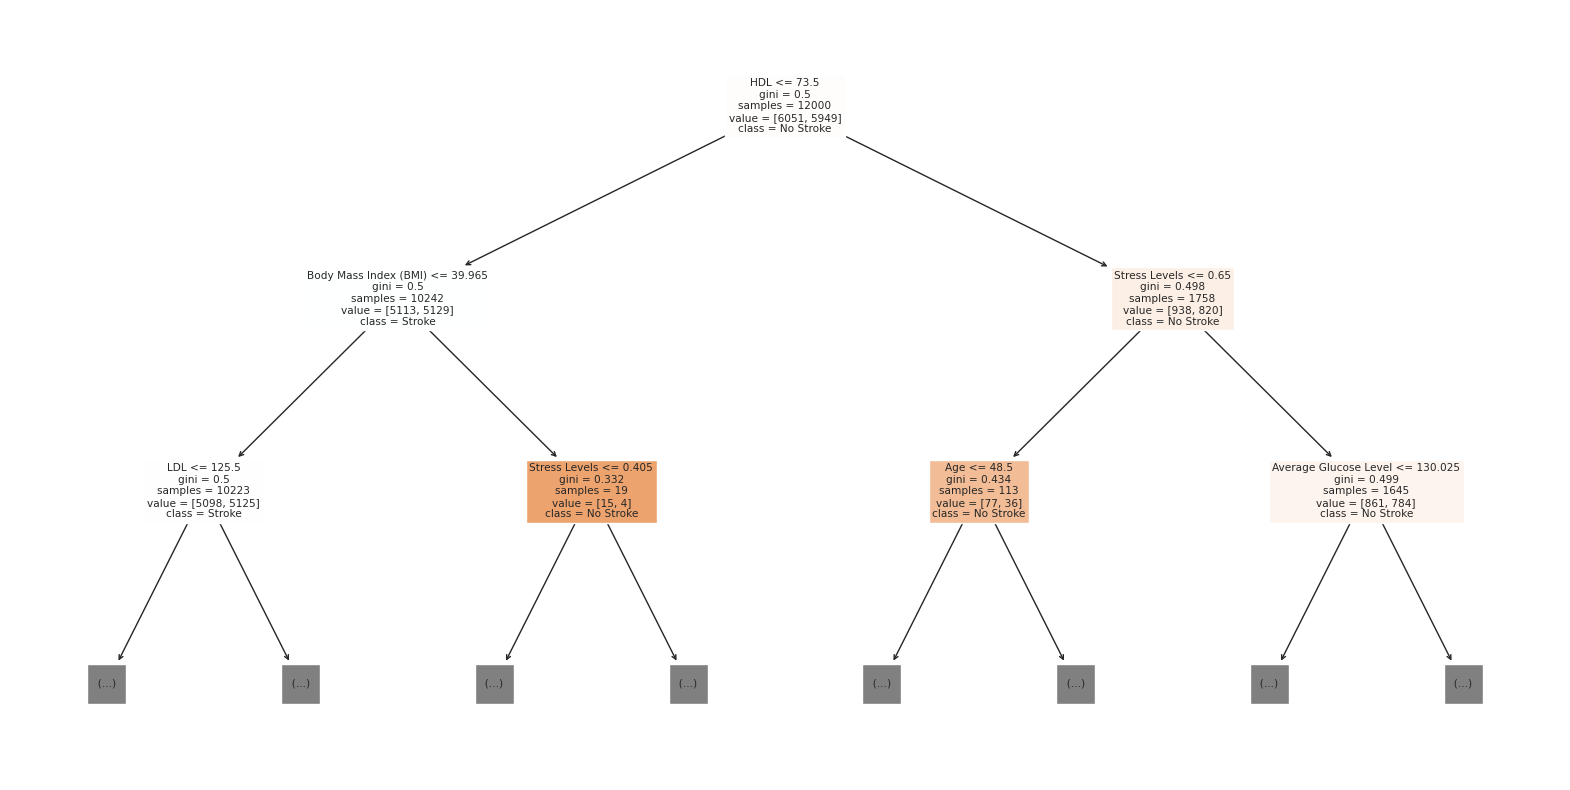

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the Decision Tree classifier
tree_model = DecisionTreeClassifier()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Calculate accuracy on the test set
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Get feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': tree_model.feature_importances_})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print all features sorted by importance in ascending order
top_features = importance_df.sort_values(by='Importance', ascending=False)
print(top_features)

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(tree_model, max_depth=2, feature_names=X_train.columns, class_names=tree_model.classes_, filled=True)
plt.show()



*Inference -*

*   The top predictors influencing stroke prediction include Body Mass Index (BMI), Average Glucose Level, and Stress Levels, highlighting their significant impact on the model's outcomes.
*   Additionally, LDL Cholesterol, HDL Cholesterol, and Diastolic Blood Pressure also demonstrate notable contributions to stroke risk assessment, underscoring the importance of lipid profile and blood pressure management.
*   Age continues to be a robust predictor, underscoring its well-established association with stroke susceptibility.
*   Features such as Dietary Habits, Symptoms_Neurological, Symptoms_General and medical history (e.g., heart disease, hypertension) exhibit moderate to lower importance, suggesting a relatively modest impact on the model's predictive accuracy.

*Interpretation of Nodes in Decision Tree -*

*   The top node, which is the first decision point, splits based on 'Body Mass Index (BMI)'. This suggests that BMI is an important feature for predicting a stroke.
*   Low LDL levels (<= 125) contribute to a positive outcome (“Yes”).
*   Stress levels (<= 65) also impact the classification (“No”).

In this decision tree, the moderate depth strikes a balance between capturing relevant information and avoiding excessive complexity.

**SHAP Analysis for Decision Tree Classifier Model**

Shape of reshaped SHAP values: (3000, 21)


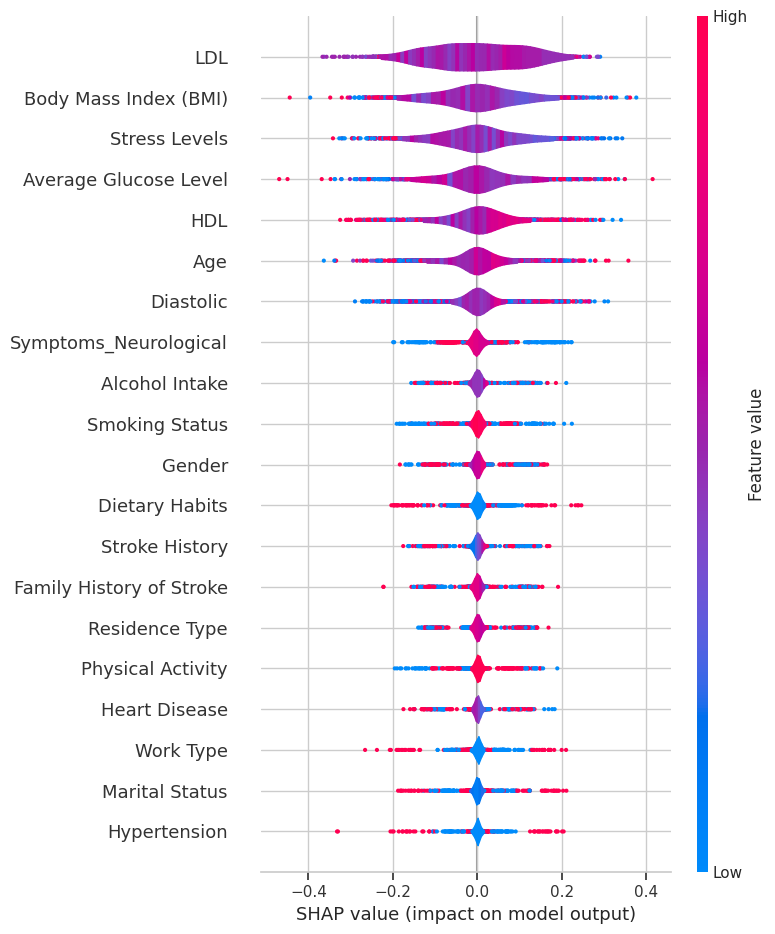

In [ ]:

import shap
import pandas as pd

# Initialize the TreeExplainer
explainer = shap.TreeExplainer(tree_model)

# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)

# Reshape the SHAP values array
shap_values_reshaped = shap_values[:, :, 1]  # Assuming you want the SHAP values for the positive class

# Check the shape of the reshaped SHAP values
print("Shape of reshaped SHAP values:", shap_values_reshaped.shape)  # Make sure it matches the shape of X_test

# Summary plot
shap.summary_plot(shap_values_reshaped, X_test, plot_type="violin", feature_names=X_test.columns, show=False)


*Interpretation of SHAP Analysis Results:*

*   Important Factors:
1.   Average Glucose Level: This feature significantly impacts the model’s
predictions. Higher glucose levels are associated with specific health conditions, affecting the outcome.
2.   LDL (Low-Density Lipoprotein): LDL levels play a crucial role. Elevated LDL levels (often considered “bad” cholesterol) can influence health outcomes.
3.   Stress Level: Stress is another key factor. High stress levels may lead to different predictions in the model.

*   Least Important Factors:
1.  Hypertension: The feature related to hypertension (high blood pressure) has minimal spread of SHAP values around zero. While hypertension is relevant for health, it doesn’t strongly differentiate outcomes in this specific context.
2.  Marital Status: Little impact on SHAP values, suggesting model does not significantly differentiate based on marital status.

**Extreme Gradient Boosting Model**

The application of XGBoost, a gradient boosting algorithm, with hyperparameter tuning using the GridSearchCV method systematically explores various combinations of hyperparameters, such as the number of trees, learning rate, and maximum tree depth, to identify the optimal model configuration. By leveraging GridSearchCV, which employs cross-validation to evaluate model performance across different parameter sets, the algorithm fine-tunes its parameters to enhance predictive accuracy. After training the model on the dataset, the best parameter values are identified, and the top-performing model is selected based on these parameters.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming rfdata is already defined
X = encdata.drop('Diagnosis', axis=1)
y = encdata['Diagnosis']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Create the XGBClassifier model
model = XGBClassifier()

In [ ]:

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'learning_rate': [0.01, 0.1],  # Learning rate
    'max_depth': [3, 4],  # Maximum depth of the tree
    'gamma': [0, 0.1],  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.8, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform cross-validation
cv_scores = cross_val_score(grid_search, X, y, cv=3)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate the precision
precision = precision_score(y_test, y_pred)

# Print the accuracy and precision
print("Accuracy:", accuracy)
print("Precision:", precision)



Cross-Validation Scores: [0.5006 0.5018 0.4976]
Mean Accuracy: 0.5000000000000001
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.49333333333333335
Precision: 0.49963741841914433


*Inference -*

*   Cross-Validation Scores: The cross-validation scores obtained are relatively
consistent, with values around 0.50. This suggests that the model's performance is stable across different folds of the training data.

*   Mean Accuracy: The mean accuracy of the model across all cross-validation folds is approximately 0.50. This indicates that, on average, the model correctly predicts the target variable for 50% of the instances in the dataset.

*   Best Parameters: The hyperparameters identified as optimal for the model are 'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 4, 'gamma': 0, 'subsample': 1.0, and 'colsample_bytree': 1.0. These parameters represent the configuration that yielded the highest accuracy during hyperparameter tuning.

*   Test Set Performance: On the test set, the model achieved an accuracy of approximately 49.3% and a precision of approximately 50%. This indicates that the model's performance on unseen data is consistent with its performance during cross-validation, suggesting its ability to generalize to new data.

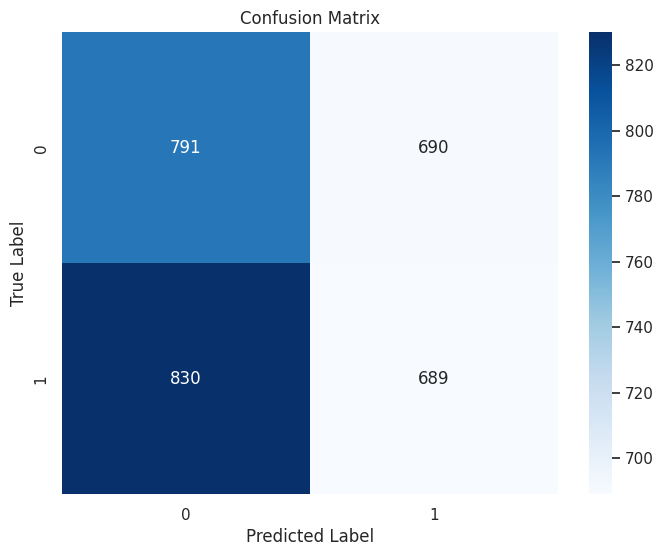

In [ ]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


The model’s performance can be assessed based on the confusion matrix. Analysis -

*   True Positives (TP): The model correctly predicted positive cases (791
instances).
*   False Negatives (FN): The model missed some positive cases (690 instances).
*   False Positives (FP): The model made incorrect positive predictions (830 instances).
*   True Negatives (TN): The model correctly predicted negative cases (689 instances).

In [ ]:
encdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  int64  
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  int64  
 5   Work Type                 15000 non-null  int64  
 6   Residence Type            15000 non-null  int64  
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  int64  
 10  Alcohol Intake            15000 non-null  int64  
 11  Physical Activity         15000 non-null  int64  
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  int64  
 14  Dietar

# **AUTOML Model**

AutoML frameworks like H2O's AutoML provide a convenient way to explore a wide range of models and identify the one that maximizes performance metrics such as accuracy, precision, recall and other useful features. AutoML is a powerful tool for automating the model selection process and finding the best model for classification and regression tasks.

**Ridge Regularization**

Ridge regularization, also known as L2 regularization, is a technique commonly used in machine learning to mitigate overfitting in regression and classification models. It achieves this by adding a penalty term to the model's cost function, which is proportional to the square of the magnitude of the model's coefficients. The regularization helps prevent overfitting in classification models by discouraging overly complex decision boundaries.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 'X' is feature matrix and 'y' is target variable
# X = encdata[['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels', 'HDL', 'LDL', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake','Physical Activity', 'Stroke History', 'Family History of Stroke', 'Dietary Habits', 'Symptoms_General', 'Symptoms_Neurological']]

X = encdata.drop('Diagnosis', axis=1)
y = encdata['Diagnosis']

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Ridge regression object with regularization parameter (alpha)
alpha = 1.0  # You can adjust this parameter
ridge_model = Ridge(alpha=alpha)

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients
print("Ridge Coefficients:", ridge_model.coef_)


Mean Squared Error: 0.24990033790524324
Ridge Coefficients: [-1.92030060e-05 -1.86051171e-03 -1.14633023e-02  3.59567334e-03
 -1.32469627e-02 -1.44527832e-02  8.13445984e-04  2.00335238e-04
 -5.11150447e-04 -5.34861191e-03 -6.43799948e-03 -2.18593471e-03
 -1.10436230e-02 -8.24097009e-03 -5.52920736e-03 -2.43648668e-03
 -5.00746686e-04  1.17278460e-04  5.41700023e-05 -3.68529332e-02
 -2.08433654e-02]


**Regularized dataset**

In [ ]:
# Save DataFrame to a CSV file
encdata.to_csv('stroke_prediction_regularized.csv', index=False)

In [ ]:
# Install the 'requests' library for making HTTP requests
!pip install requests

# Install the 'tabulate' library for tabulating data in a readable format
!pip install tabulate

# Install the 'colorama' library for adding colored output to terminal text
!pip install "colorama>=0.3.8"

# Install the 'future' package for compatibility between Python 2 and 3
!pip install future

In [ ]:
# Install the H2O Python package using pip
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.3 MB/s eta 0:00:00


In [ ]:
import h2o  # Importing H2O for machine learning tasks
from h2o.automl import H2OAutoML  # Importing H2O's AutoML functionality
import random, os, sys  # General system-related imports
from datetime import datetime  # Import for working with datetime objects
import pandas as pd  # Importing pandas for data manipulation
import logging  # Import for logging messages
import csv  # Import for working with CSV files
import optparse  # Import for parsing command-line options
import time  # Import for working with time-related tasks
import json  # Import for working with JSON data
from distutils.util import strtobool  # Import for converting strings to boolean values
import psutil  # Import for working with system processes
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization


In [ ]:
# Minimum memory size (in gigabytes) to allocate for H2O initialization
min_mem_size = 6

# Maximum runtime (in seconds) for H2O initialization
run_time = 222

In [ ]:
# Percentage of available system memory allocated for H2O initialization
pct_memory = 0.5

# Get information about the virtual memory of the system using psutil
virtual_memory = psutil.virtual_memory()

# Calculate the minimum memory size (in gigabytes) for H2O initialization
# The available memory is multiplied by pct_memory and then divided by 1073741824 to convert bytes to gigabytes
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))

# Print the calculated minimum memory size for H2O initialization
print(min_mem_size)


5


In [ ]:
# Generate a random port number between 5555 and 55555
port_no = random.randint(5555, 55555)

# Attempt to initialize H2O with specified settings
try:
    # Initialize H2O with the given parameters
    h2o.init(strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no)
except:
    # If initialization fails, log an error, download logs, shut down the cluster, and exit with an error code
    logging.critical('h2o.init')
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)


Checking whether there is an H2O instance running at http://localhost:21819..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpe2i3dlmq
  JVM stdout: /tmp/tmpe2i3dlmq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpe2i3dlmq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:21819
Connecting to H2O server at http://127.0.0.1:21819 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    20 days
H2O_cluster_name:           H2O_from_python_unknownUser_u196zg
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    5 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:21819
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
# Import the processed data into H2O from the specified URL
url = "/content/stroke_prediction_regularized.csv"
df = h2o.import_file(path=url)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Define the percentage of rows for the training set
pct_rows = 0.80

# Perform an 80/20 train-test split using the split_frame method
# The split_frame method takes a list of percentages, in this case [pct_rows]
# 80% of the rows will be assigned to df_train (training set)
# 20% of the rows will be assigned to df_test (test set)
# df is the h2o imported dataframe
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(12051, 22)
(2949, 22)


In [ ]:
#Display all columns in X
X=df.columns
print(X)

['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Stroke History', 'Family History of Stroke', 'Dietary Habits', 'Stress Levels', 'HDL', 'LDL', 'Diagnosis', 'Diastolic', 'Symptoms_General', 'Symptoms_Neurological']


In [ ]:
#Seperate Dependent variable from Independent variable
y ='Diagnosis'
X.remove(y)
print(X)

['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status', 'Work Type', 'Residence Type', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Stroke History', 'Family History of Stroke', 'Dietary Habits', 'Stress Levels', 'HDL', 'LDL', 'Diastolic', 'Symptoms_General', 'Symptoms_Neurological']


In [ ]:
# Convert the target variable to a categorical factor in the training set
df_train['Diagnosis'] = df_train['Diagnosis'].asfactor()


asfactor() is used to convert the 'Diagnosis' column in the DataFrame df_train into a categorical factor using H2O's AutoML framework

In [ ]:
df_train.head()

Age    Gender    Hypertension    Heart Disease    Marital Status    Work Type    Residence Type    Average Glucose Level    Body Mass Index (BMI)    Smoking Status    Alcohol Intake    Physical Activity    Stroke History    Family History of Stroke    Dietary Habits    Stress Levels    HDL    LDL  Diagnosis      Diastolic    Symptoms_General    Symptoms_Neurological
-----  --------  --------------  ---------------  ----------------  -----------  ----------------  -----------------------  -----------------------  ----------------  ----------------  -------------------  ----------------  --------------------------  ----------------  ---------------  -----  -----  -----------  -----------  ------------------  -----------------------
   56         1               0                1                 0            0                 0                   130.91                    22.37                 0                 1                    1                 0                           1                 1             3.48     68    133  Stroke               108                   0                        1
   80         1               0                0                 1            0                 1                   183.73                    32.57                 0                 0                    0                 0                           0                 0             1.73     63     70  Stroke                91                   0                        0
   26         1               1                1                 0            1                 0                   189                       20.32                 1                 0                    1                 0                           1                 0             7.31     59     95  Stroke                97                   0                        1
   73         1               0                0                 0            1                 1                   185.29                    27.5                  0                 1                    1                 0                           0                 0             5.35     70    137  No Stroke             81                   0                        1
   62         0               0                0                 1            0                 1                    91.6                     37.47                 1                 1                    1                 0                           0                 0             4.85     80     69  Stroke                64                   1                        0
   61         0               0                1                 0            0                 0                   194.73                    26.44                 1                 0                    1                 1                           0                 1             5.85     66    134  Stroke                72                   1                        0
   82         1               0                0                 0            0                 1                   111.23                    28.83                 1                 0                    1                 1                           1                 0             8.39     32     88  No Stroke             88                   0                        1
   41         1               0                1                 0            0                 1                    94.9                     36.74                 1                 1                    0                 1                           1                 0             1.56     32    114  No Stroke             80                   0                        1
   80         0               0                0                 1            0                 1                   136.06                    25.19                 1                 0                    1                 1                           0                 0             4.14     40

## **H20 AutoML Execution**

In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
#pass the data through H20AutoML
aml.train(x=X,y=y,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20240403_24710_model_4


Model Summary: 
    number_of_trees
--  -----------------
    1

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.2410708796335434
RMSE: 0.4909896940196845
LogLoss: 0.6751961049931472
Mean Per-Class Error: 0.4441882360433062
AUC: 0.6503873139464641
AUCPR: 0.6356662682644078
Gini: 0.3007746278929282

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4519878029823303
           No Stroke    Stroke    Error    Rate
---------  -----------  --------  -------  ----------------
No Stroke  1070         4982      0.8232   (4982.0/6052.0)
Stroke     391          5608      0.0652   (391.0/5999.0)
Total      1461         10590     0.4459   (5373.0/12051.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.451988     0.676111  122
max f2                       0.41183      0.832361  147
max f0point5                 0.49697      0.604671  74
max accuracy                 0.502702     0.605842  72
max precision                0.596855     0.829787  0
max recall                   0.38954      1         148
max specificity              0.596855     0.998678  0
max absolute_mcc             0.5          0.211886  73
max min_per_class_accuracy   0.502702     0.596099  72
max mean_per_class_accuracy  0.5          0.605904  73
max tns                      0.596855     6044      0
max fns                      0.596855     5960      0
max fps                      0.38954      6052      148
max tps                      0.38954      5999      148
max tnr                      0.596855     0.998678  0
max fnr                      0.596855     0.993499  0
max fpr                      0.38954      1         148
max tpr                      0.38954      1         148

Gains/Lift Table: Avg response rate: 49.78 %, avg score: 49.94 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0111194                   0.584092           1.63405   1.63405            0.813433         0.592115  0.813433                    0.592115            0.0181697       0.0181697                  63.4052   63.4052            0.0140388
2        0.0229027                   0.570279           1.5137    1.57213            0.753521         0.574845  0.782609                    0.58323             0.0178363       0.036006                   51.3699   57.2132            0.0260919
3        0.0347689                   0.56942            1.47502   1.53899            0.734266         0.569433  0.76611                     0.578521            0.0175029       0.0535089                  47.5019   53.8988            0.0373159
4        0.0463862                   0.566759           1.46358   1.5201             0.728571         0.567757  0.756708                    0.575825            0.0170028       0.0705118                  46.358    52.0102            0.0480398
5        0.05568                     0.565908           1.45282   1.50887            0.723214         0.566094  0.751118                    0.574201            0.0135023       0.084014                   45.2818   50.8871            0.0564198
6        0.104556                    0.550828           1.39493   1.45561            0.694397         0.557652  0.724603                    0.566465            0.068178        0.152192                   39.4929   45.5608            0.0948556
7        0.15

*Inference -*

*   The H2OXGBoostEstimator model was trained using XGBoost for binary classification, specifically for predicting stroke occurrence.
*   While the model achieved relatively low Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) on the training data, its performance metrics on cross-validation data are less impressive,
*   Maximum metrics highlight the thresholds at which various evaluation metrics like F1 score, accuracy, and precision achieve their maximum values.
*   The gains/lift table suggests that the model's predictive power in identifying stroke cases is slightly better than random chance, but still relatively modest.
*   Variable importances analysis indicates that features such as "Average Glucose Level" and "Body Mass Index (BMI)" have the most significant impact on the model's predictions.

**AutoML Leaderboard**

In [ ]:
leaderboard = aml.leaderboard
print(leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
XGBoost_grid_1_AutoML_1_20240403_24710_model_4          0.51597    0.694201  0.511626                0.499422  0.50052   0.25052
GLM_1_AutoML_1_20240403_24710                           0.511357   0.692964  0.504793                0.499753  0.499909  0.249909
StackedEnsemble_BestOfFamily_4_AutoML_1_20240403_24710  0.509015   0.693099  0.506695                0.499257  0.499976  0.249976
DeepLearning_grid_1_AutoML_1_20240403_24710_model_1     0.507643   0.73198   0.501673                0.499425  0.516958  0.267245
GBM_grid_1_AutoML_1_20240403_24710_model_3              0.506272   0.69585   0.504645                0.49893   0.501334  0.251336
StackedEnsemble_AllModels_3_AutoML_1_20240403_24710     0.505569   0.693295  0.506453                0.499506  0.500074  0.250074
GBM_4_AutoML_1_20240403_24710                           0.505464   0.704702  0.499763      


The AutoML leaderboard provides a comprehensive overview of the performance of various machine learning models on the given dataset. Models are evaluated based on key metrics such as AUC, log loss, AUCPR, mean per class error, RMSE, and MSE. The XGBoost model emerged as the top performer with the highest AUC score of 0.51597. However, while this model excelled in AUC, its performance across other metrics such as log loss and mean per class error was not as strong. Other models, including GLM, Stacked Ensemble, Deep Learning, and GBM, also showcased varying degrees of performance across different evaluation criteria. The leaderboard facilitates easy comparison among models, aiding in the selection of the most suitable model based on specific requirements and considerations such as interpretability and overall performance.

Leader Model:  XGBoost_grid_1_AutoML_1_20240403_24710_model_4
Second Best Model:  GLM_1_AutoML_1_20240403_24710


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_1_20240403_24710_model_4

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4519878029823303
           No Stroke    Stroke    Error    Rate
---------  -----------  --------  -------  ------------
No Stroke  12           47        0.7966   (47.0/59.0)
Stroke     2            39        0.0488   (2.0/41.0)
Total      14           86        0.49     (49.0/100.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

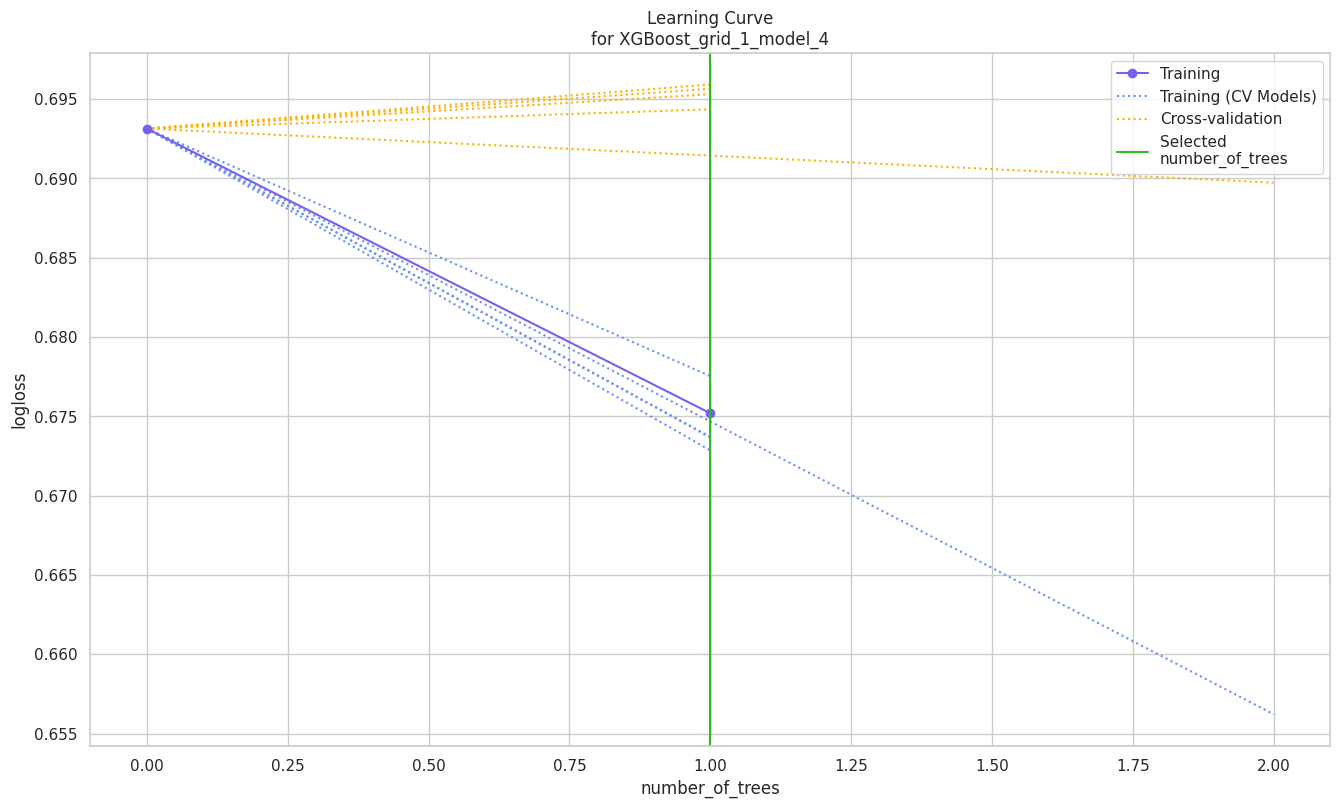

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

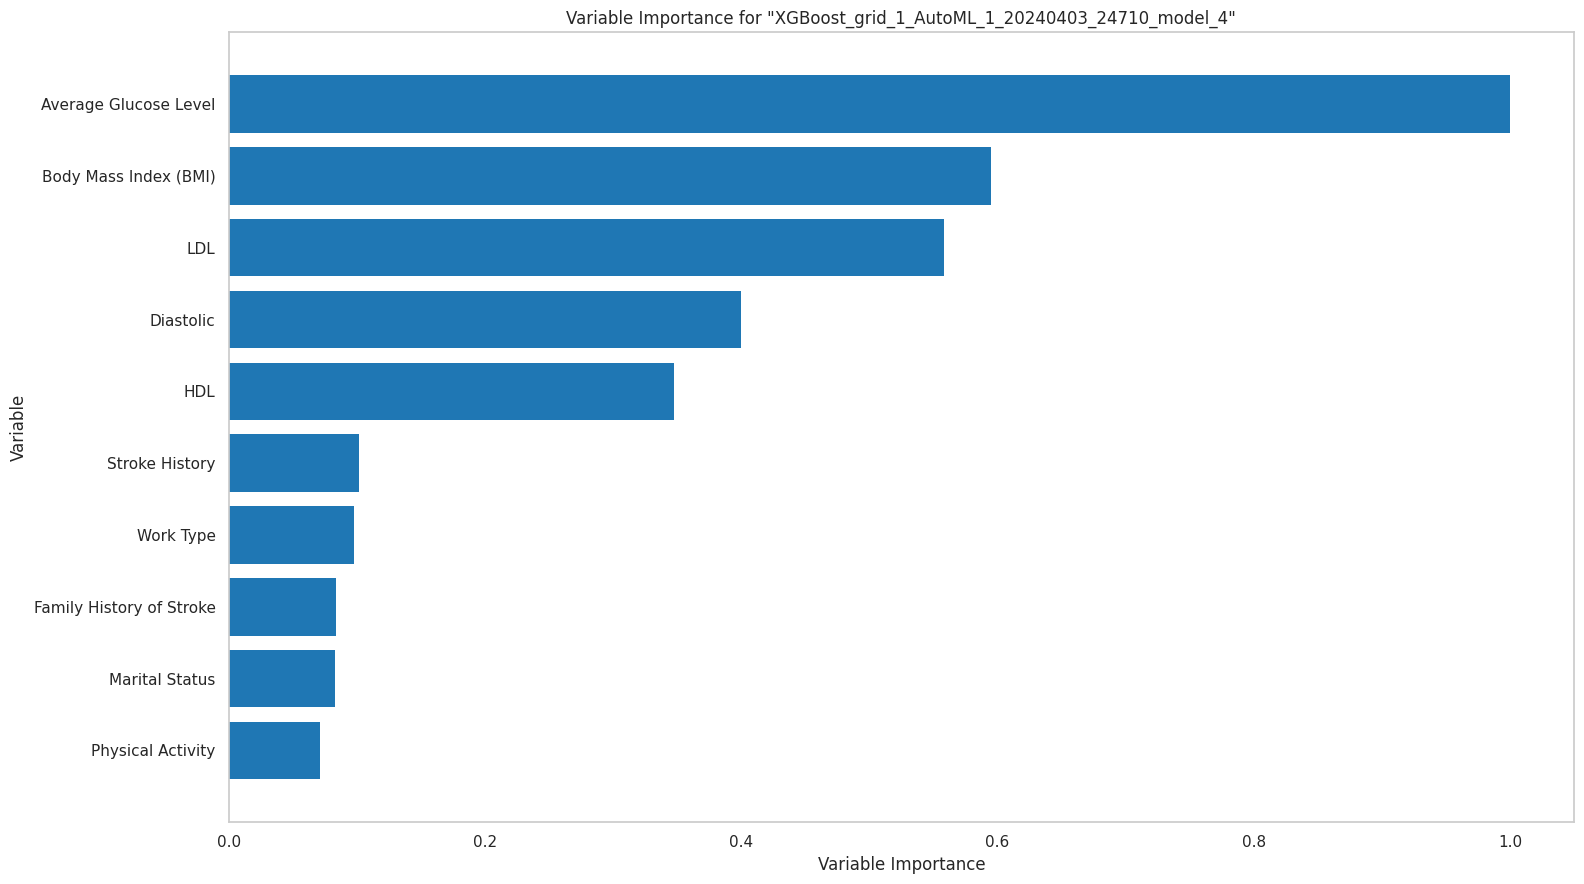

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

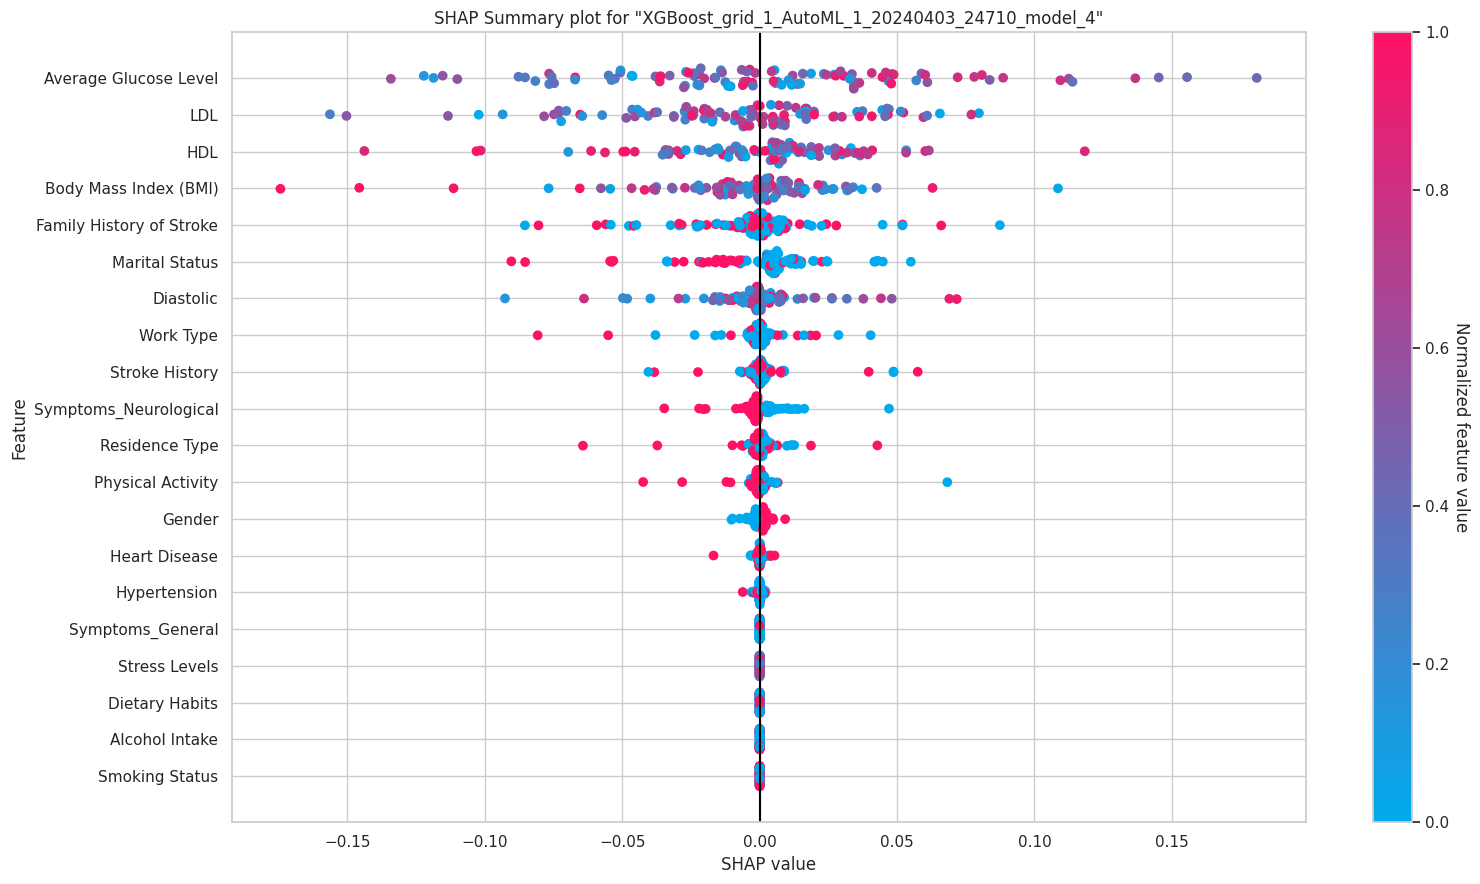

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

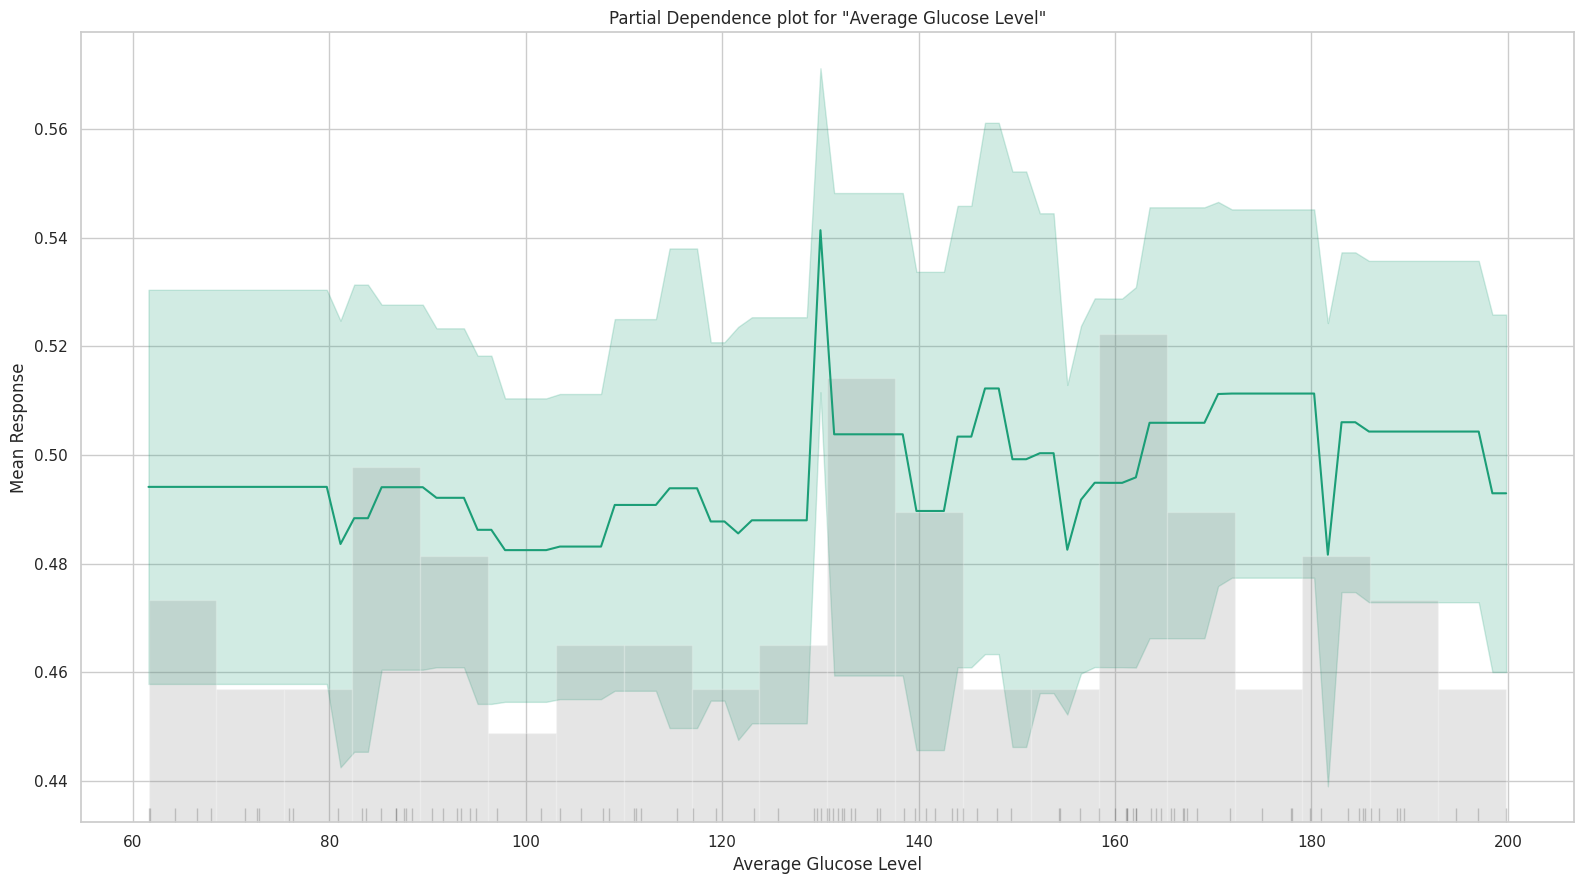

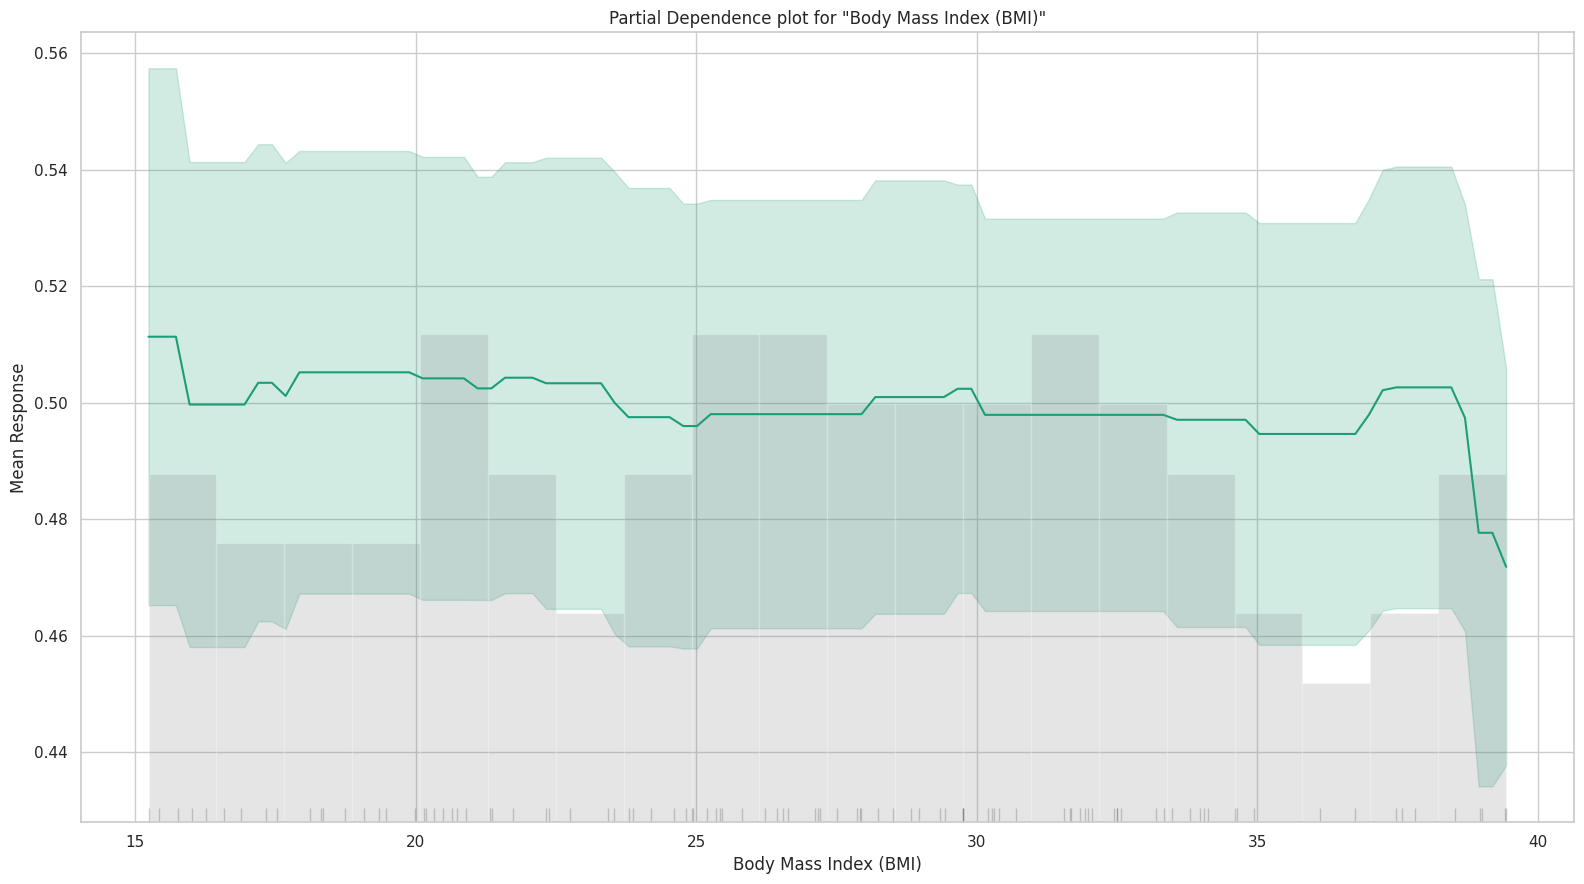

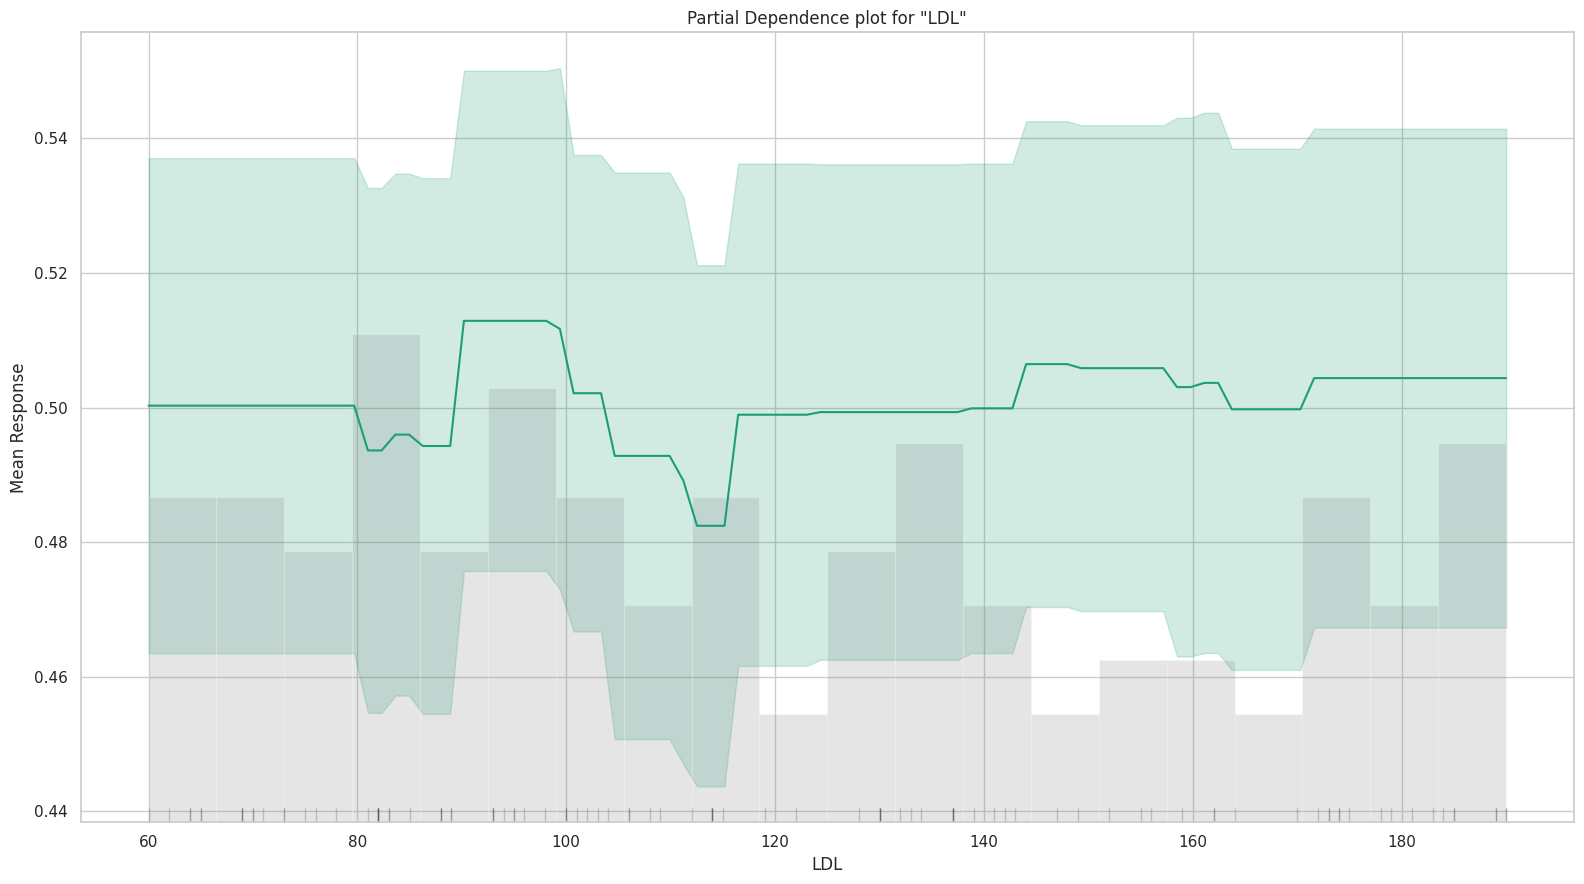

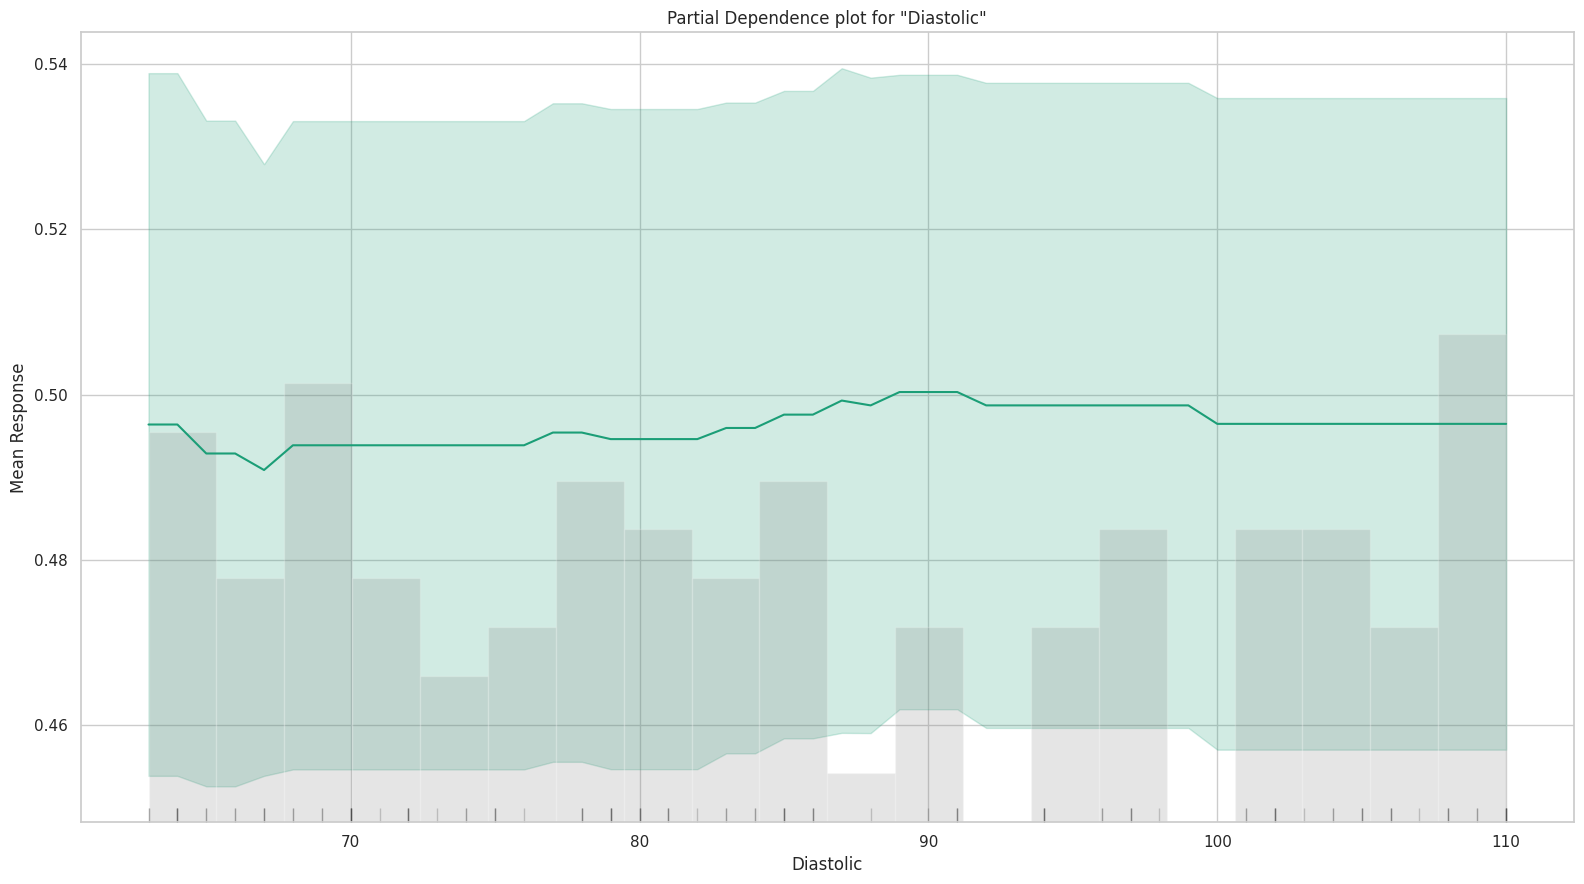

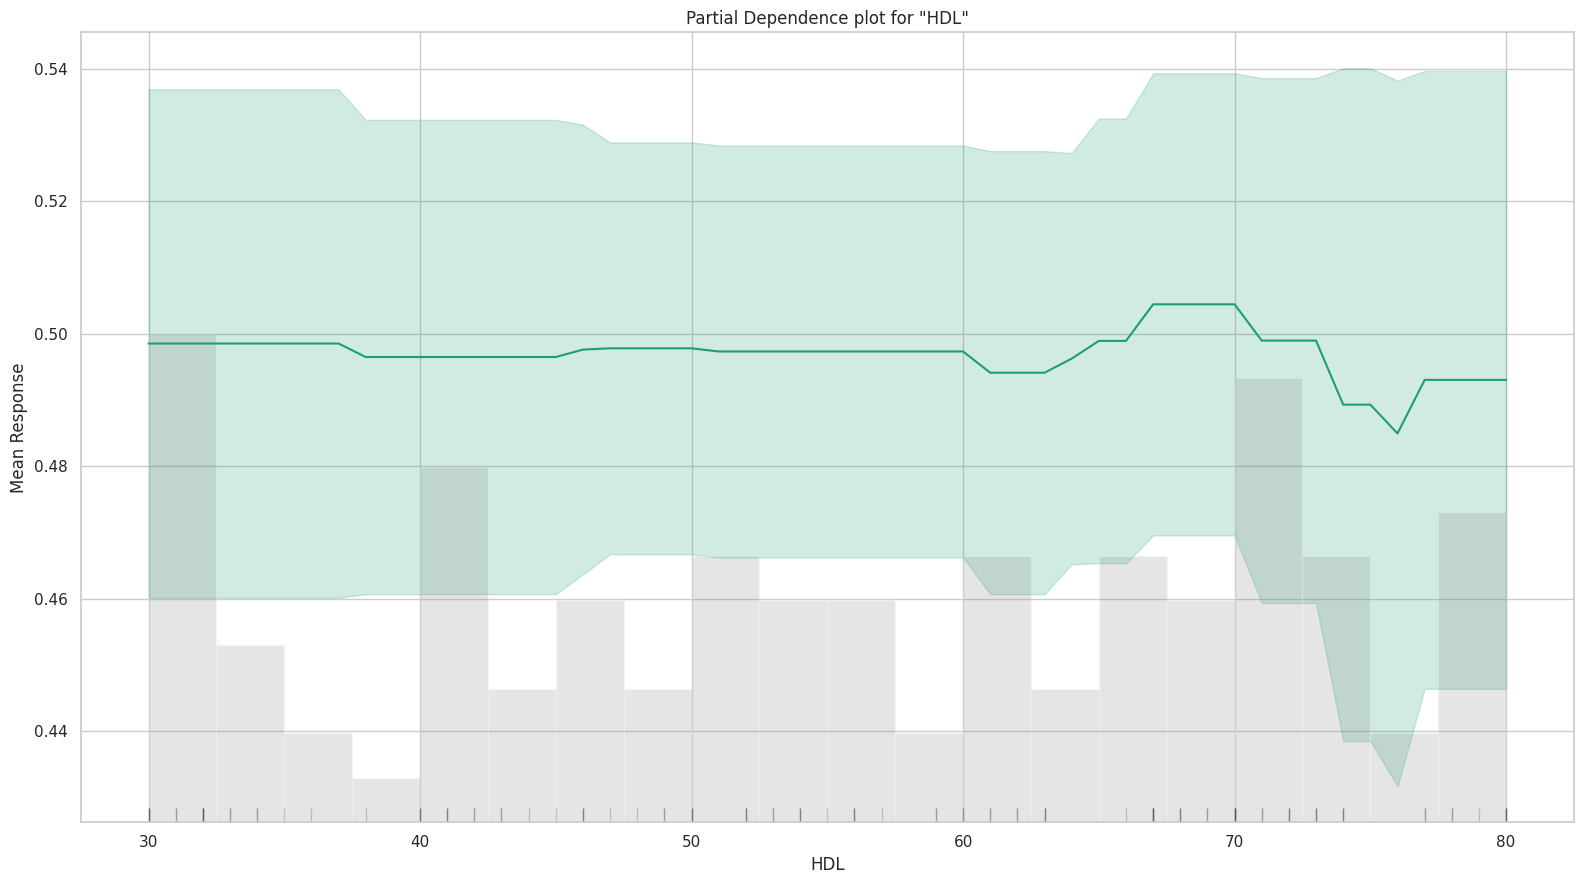

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## XGBoost_grid_1_AutoML_1_20240403_24710_model_4

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4519878029823303
           No Stroke    Stroke    Error    Rate
---------  -----------  --------  -------  ------------
No Stroke  12           47        0.7966   (47.0/59.0)
Stroke     2            39        0.0488   (2.0/41.0)
Total      14           86        0.49     (49.0/100.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

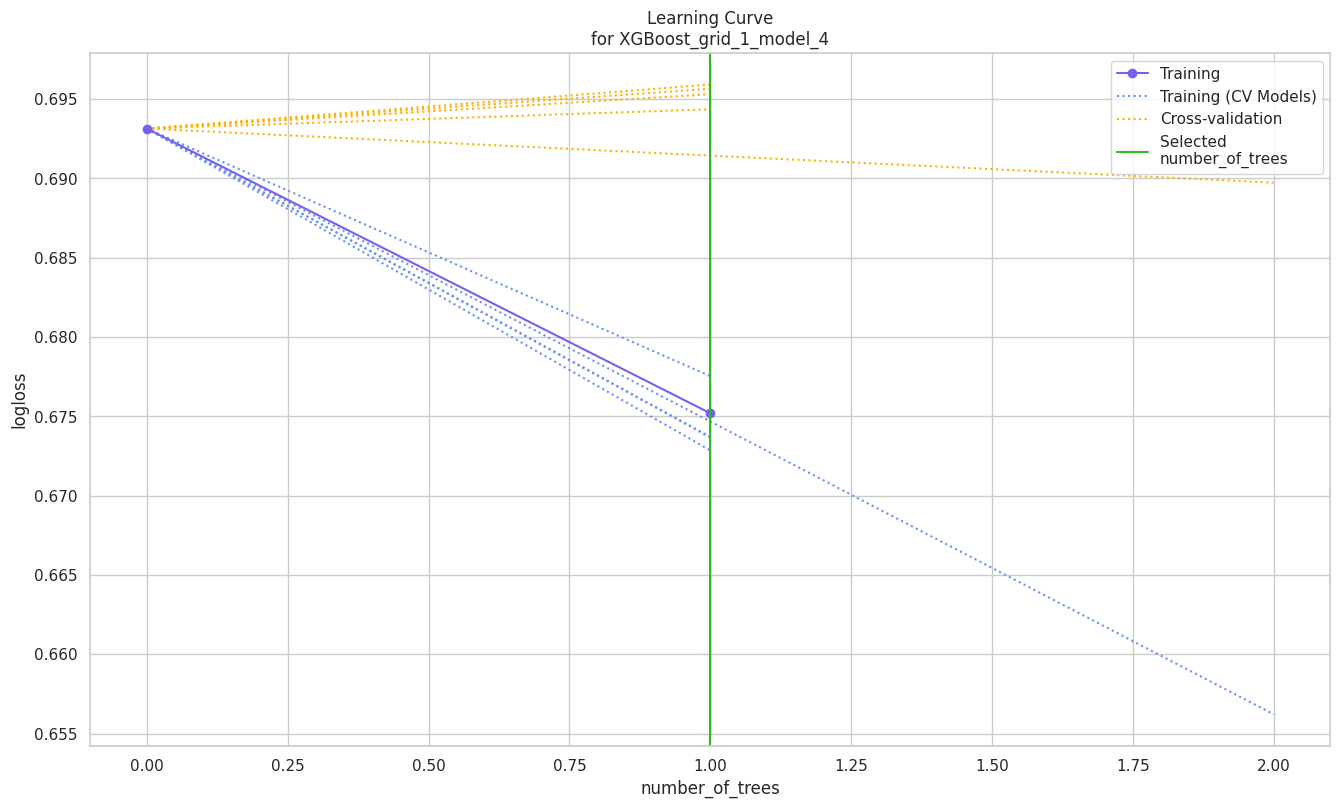

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

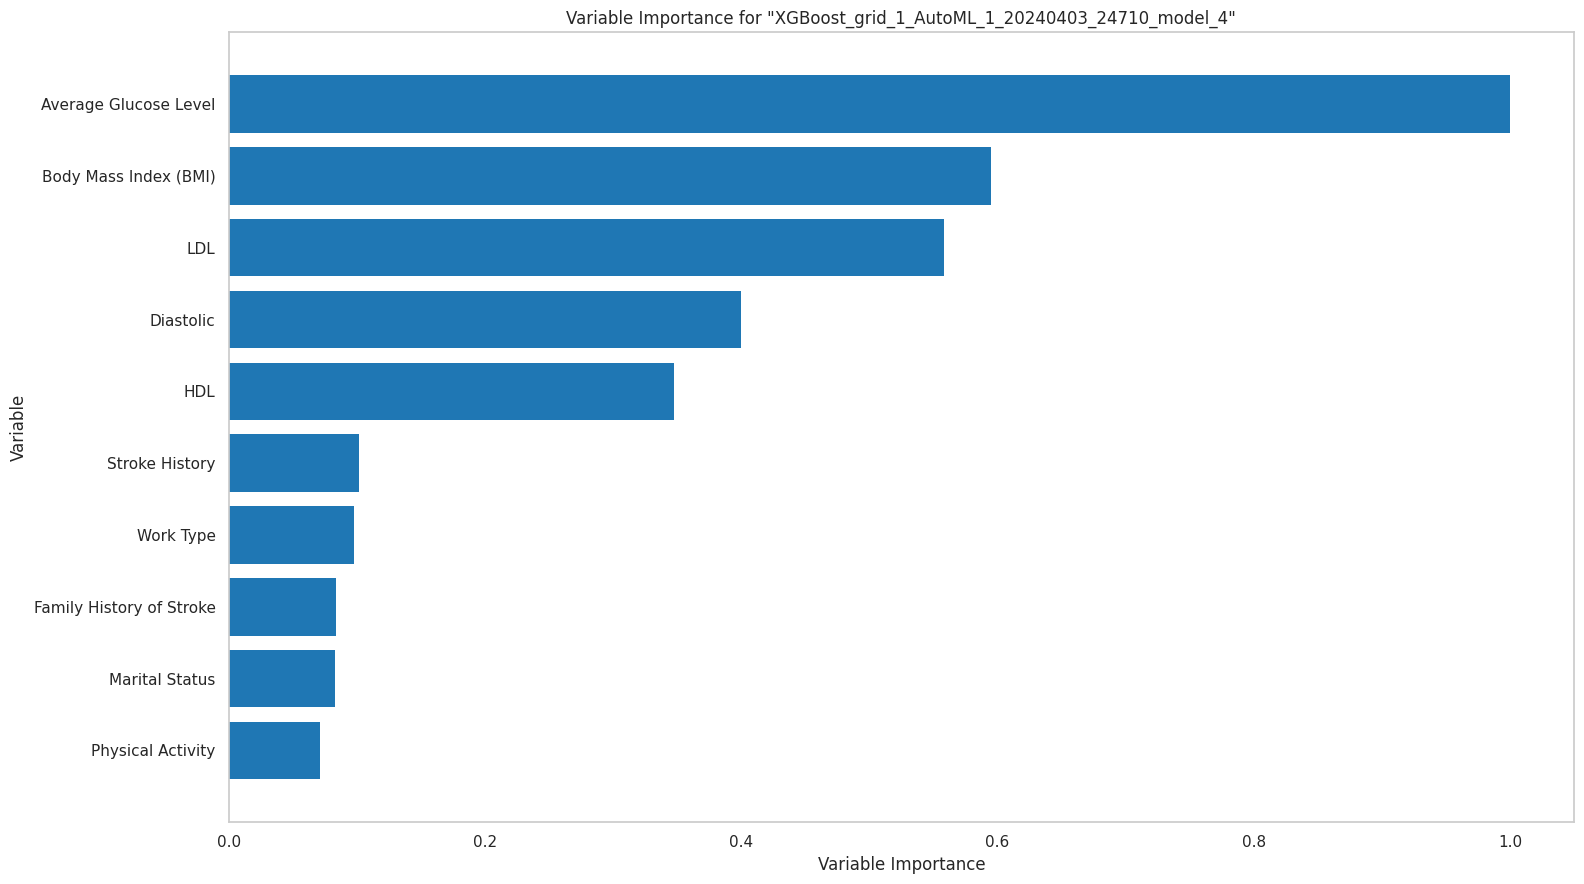

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

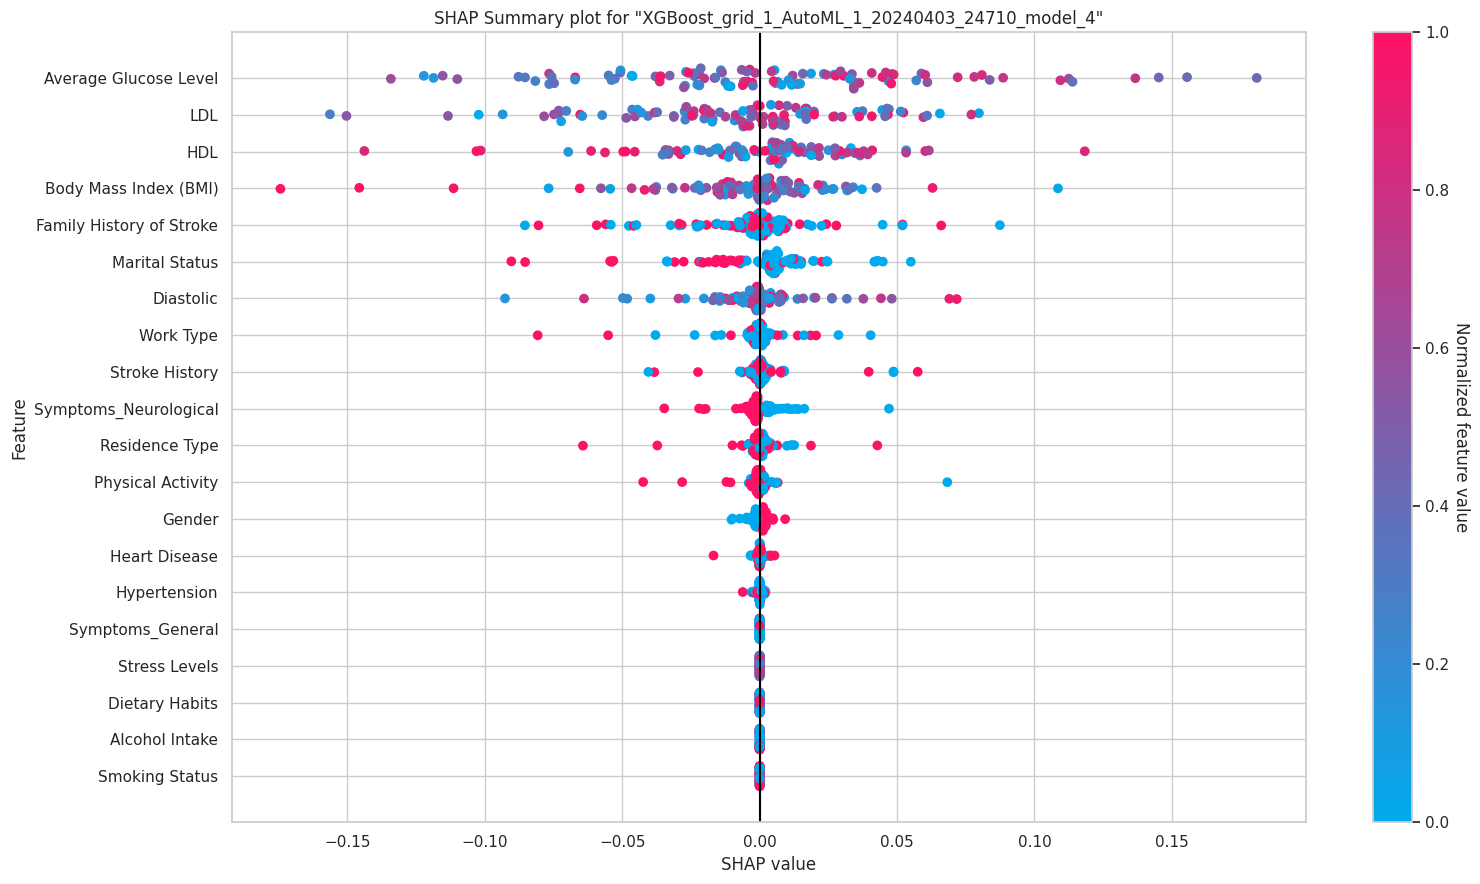

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

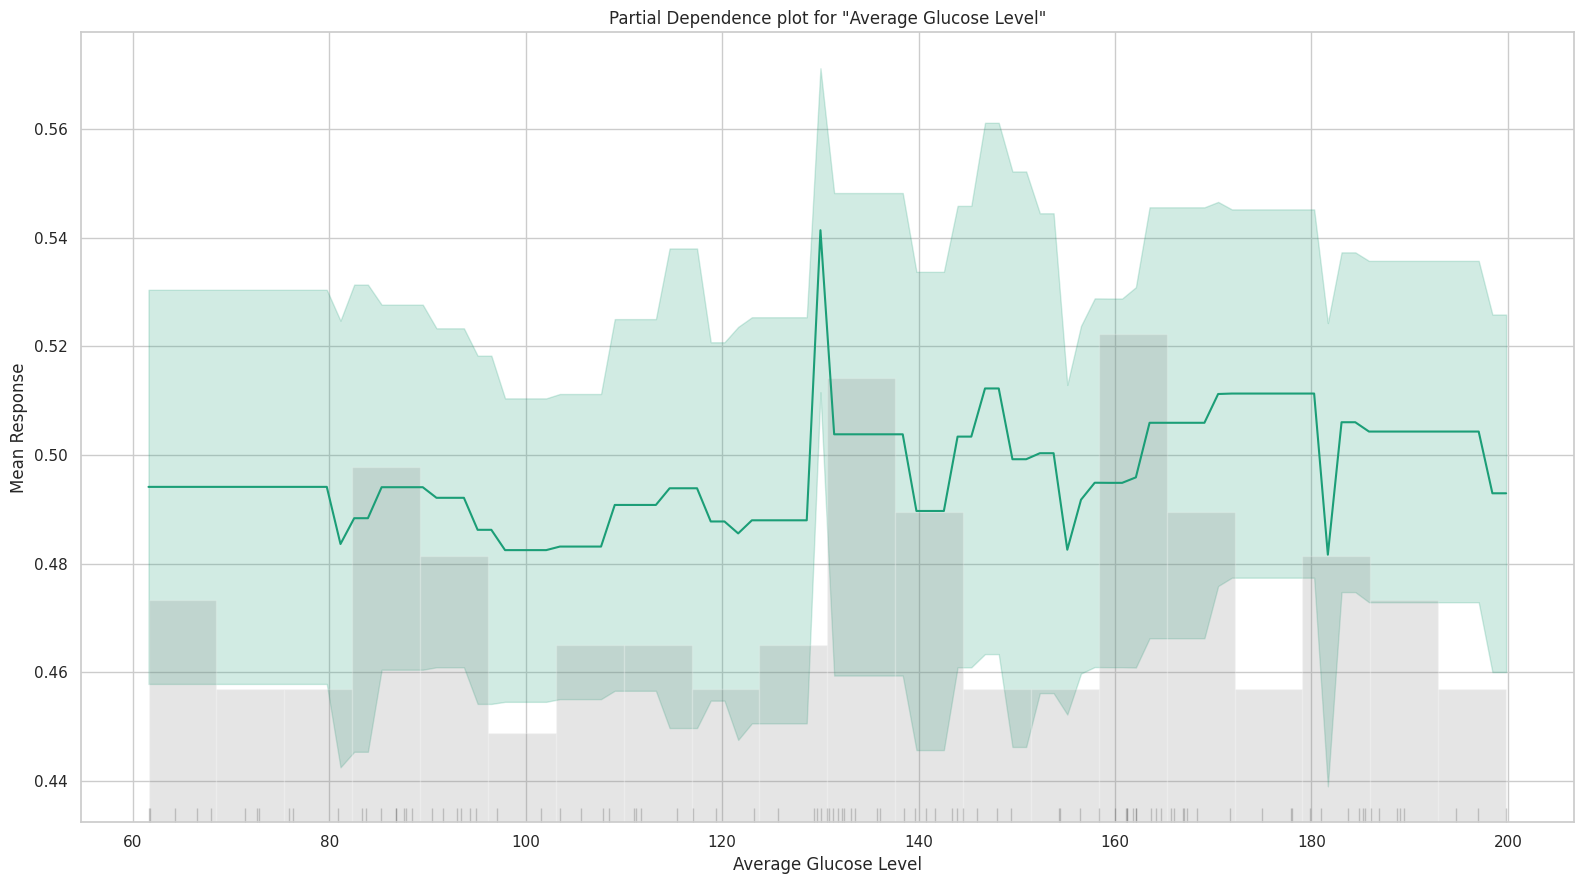

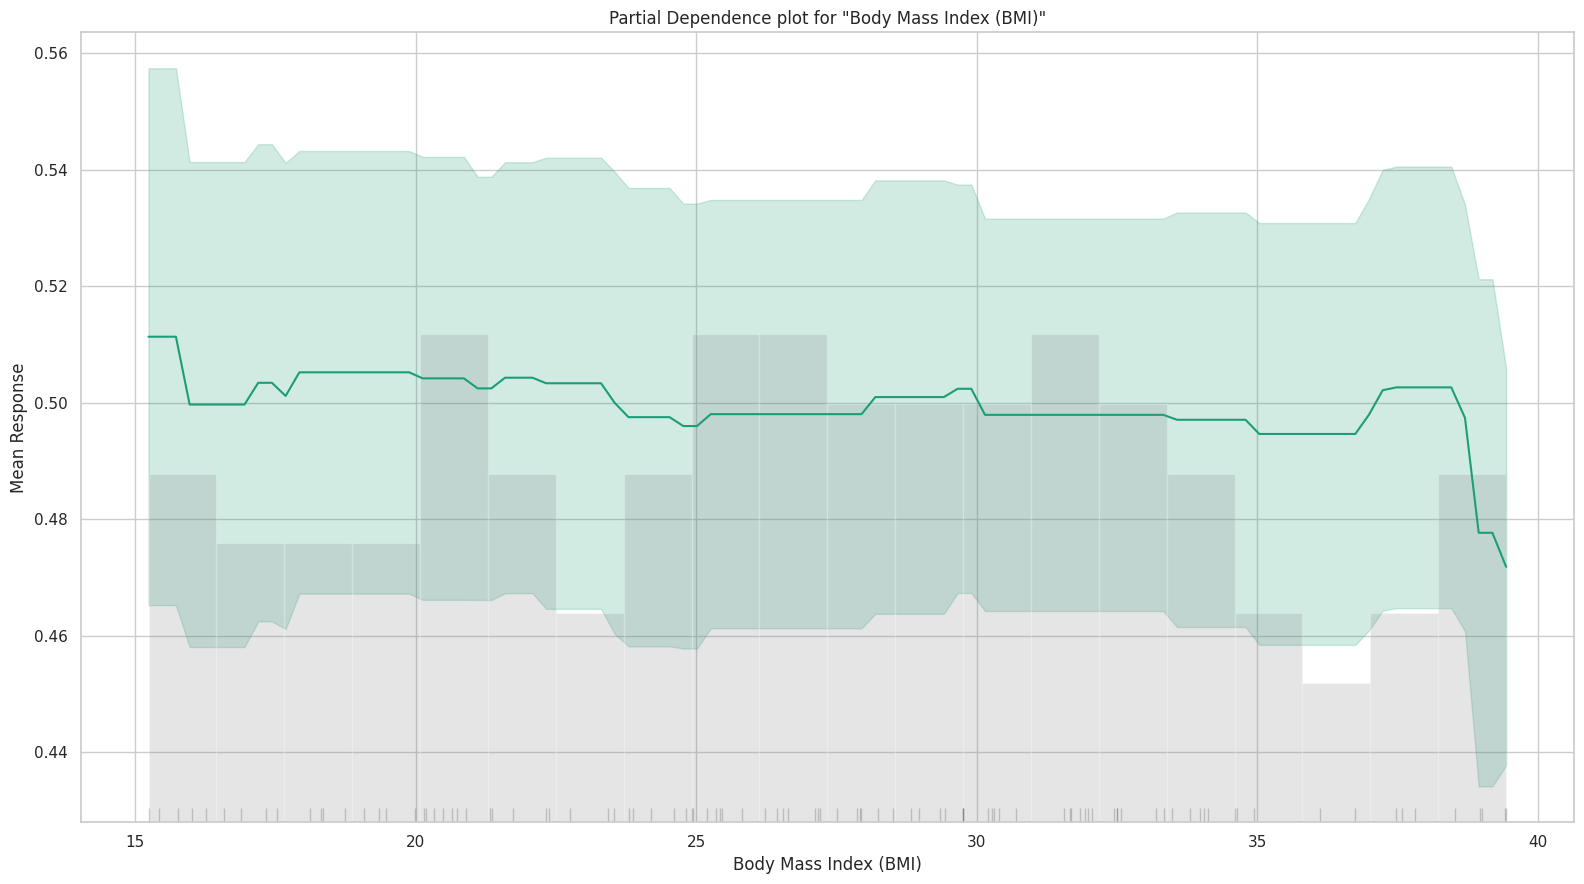

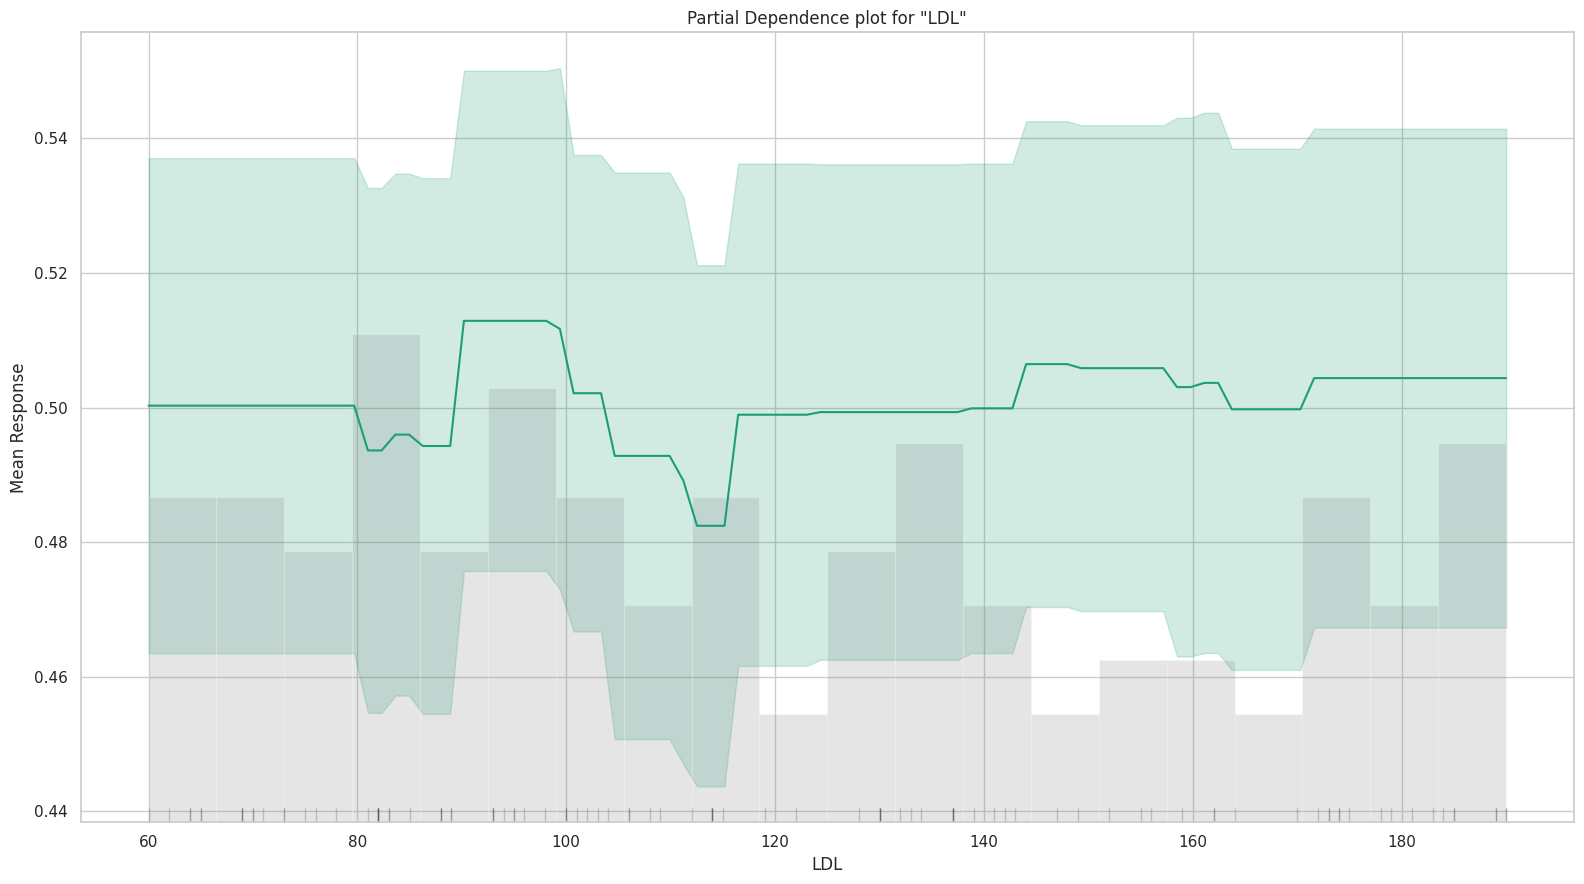

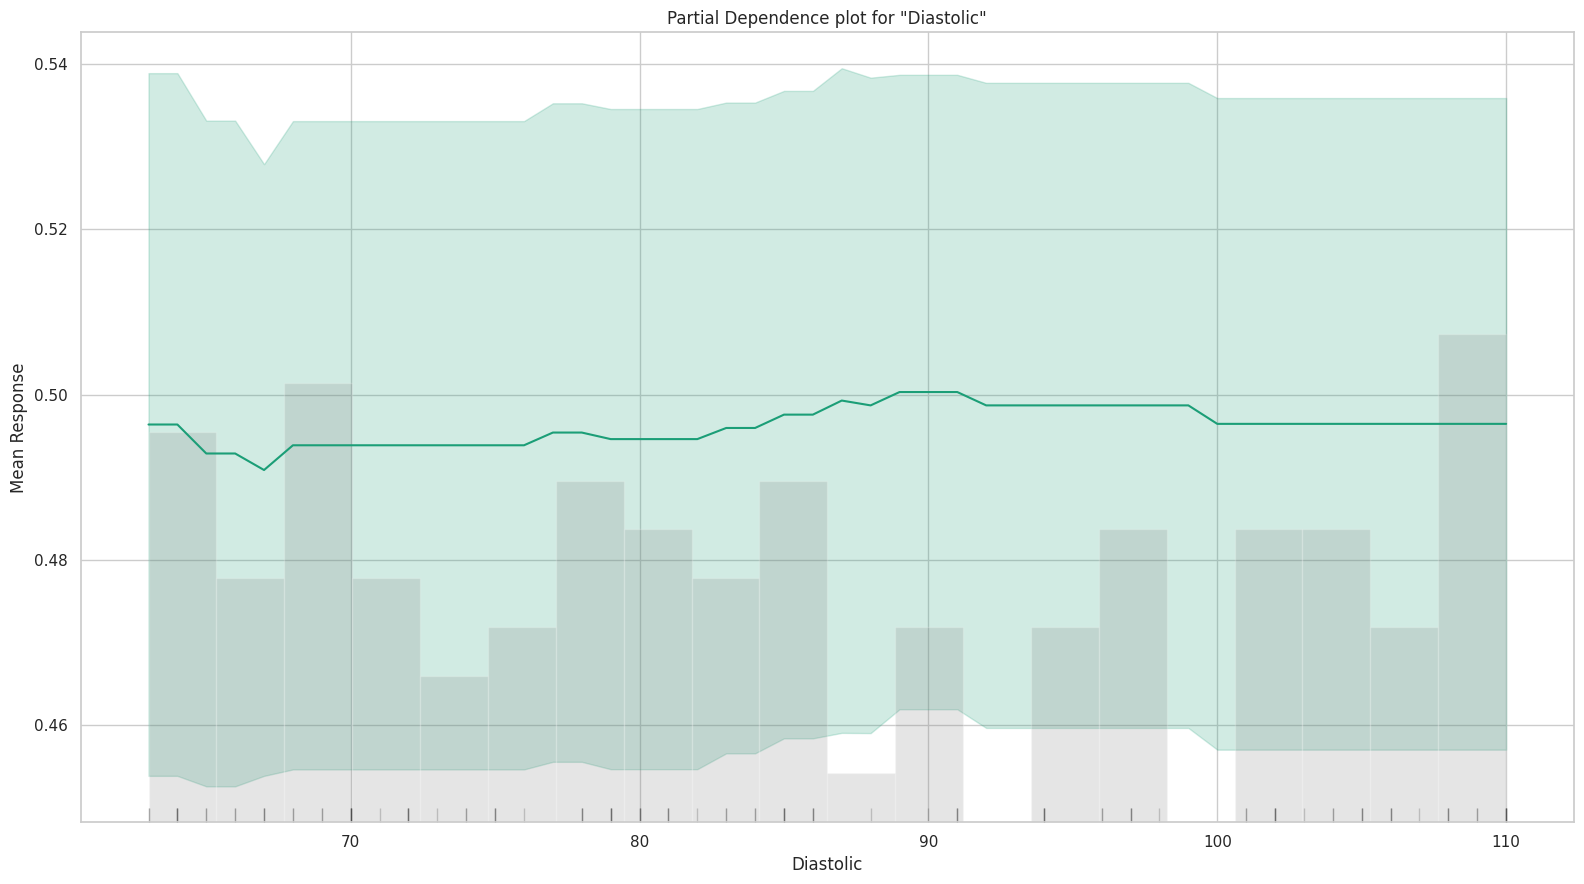

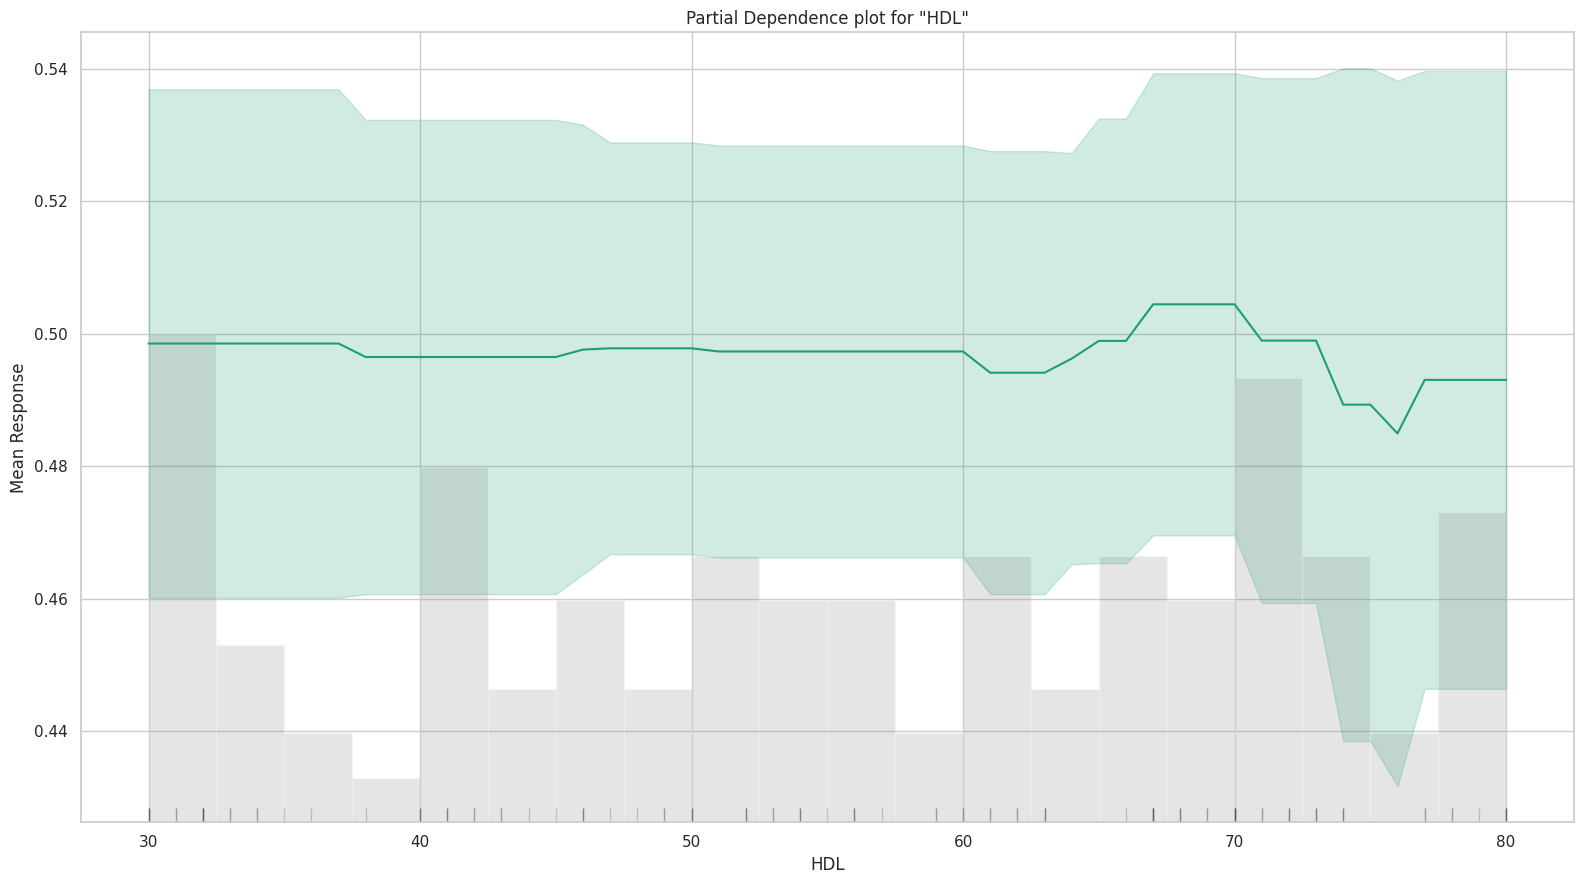

In [ ]:
# Best Models
best_model = aml.leader
leaderboard = aml.leaderboard

# Get the second-best model from the leaderboard
second_best_model = leaderboard[1, "model_id"]

# Print the model names
print("Leader Model: ", best_model.model_id)
print("Second Best Model: ", second_best_model)

# Explain the leader model
best_model.explain(df_train[0:100, :])

*Inference from Variable Importance Graph -*

*   “Average Glucose Level” (AGL): This feature has the highest importance. AGL
significantly influences stroke risk. Elevated glucose levels are associated with health conditions that increase the likelihood of stroke.
*   “LDL” (Low-Density Lipoprotein): LDL levels also play a crucial role. High LDL (often considered “bad” cholesterol) can contribute to stroke risk.
*   “HDL” (High-Density Lipoprotein): HDL levels (often considered “good” cholesterol) are relevant. Maintaining optimal HDL levels may help reduce stroke risk.


*Inference from SHAP Analysis -*

*   Important Factors:

1.   Average Glucose Level: This feature has a significant impact, as indicated by its wide spread of SHAP values. Higher glucose levels (indicated by red dots) generally lead to higher model output values. Elevated glucose levels are often associated with health conditions like diabetes, which can influence the model’s predictions.
2.   LDL (Low-Density Lipoprotein): LDL levels play a crucial role. Elevated LDL levels (often considered “bad” cholesterol) can influence health outcomes.
3.   HDL (High-Density Lipoprotein): Similarly, HDL levels (often considered “good” cholesterol) also exhibit variability in influencing the predictions.

* Least Important Factors:

1.   Smoking Status, Alcohol Intake, and Dietary Habits: These features have clustered SHAP values around zero, indicating they have minimal impact on the model’s predictions. Here’s why:
2.   Smoking Status: The model doesn’t differentiate strongly based on smoking status. Other features contribute more significantly.
3.   Alcohol Intake: Similarly, alcohol intake doesn’t significantly impact the predictions.
Dietary Habits: The model considers dietary habits but doesn’t rely heavily on them for predictions.


# **Key Takeaways**

**What is the question?**

The central focus of this analysis revolves around discerning the indicators associated with the likelihood of stroke using the Stroke Prediction Dataset, which encompasses a comprehensive array of health-related data. The goal is to assess the dataset's integrity, pinpoint essential features influencing stroke prediction, and evaluate the effectiveness of diverse modeling methods in this context. To address these objectives comprehensively, I delved into an array of techniques encompassing data cleaning, preprocessing, feature engineering, model training, and prediction. Through this multifaceted approach, I sought to extract actionable insights that could inform better understanding and prediction of stroke occurrences.

**What did you do?**

The analysis began with data preprocessing, including the identification and handling of outliers using boxplots and histograms to ensure data integrity. Correlation matrices were constructed to elucidate relationships among variables and identify potential predictors of stroke occurrences. The importance of different variables was assessed to guide the selection of relevant predictors for model development, and variance inflation factors were computed to mitigate multicollinearity. A range of models, including logistic regression, decision trees, Random Forest classifiers, and Automated Machine Learning (AutoML) models like Gradient Boosting Machines (GBM) or XGBoost, were trained and evaluated. The analysis also included SHAP (SHapley Additive exPlanations) to enhance the interpretability of models by providing insights into the contributions of different features.

**How well did it work?**

*Main Inference -*

Regarding model's performance, the precision result obtained from the XGBoost model is quite encouraging, hovering around 0.50. Essentially, this means that roughly half of the instances flagged as positive by the model are indeed true positives. It's a reassuring sign of the model's ability to accurately categorize instances into either the Stroke or No Stroke class. However, while precision is a key metric, it's important to view it alongside other performance measures like recall and accuracy to get a full picture of the model's effectiveness. Despite achieving relatively high precision, the overall accuracy remains somewhat modest.

To improve accuracy and fine-tune model performance for predicting both binary classes,  a journey of extensive data preprocessing and feature engineering was required. This involved not just organizing the data into a format that the model could easily digest, but also encoding it to make numerical interpretation simpler. Additionally, I had to address multicollinearity issues while making use of regularization techniques to reduce overfitting risks. Despite the efforts and the deployment of various models, including linear, tree-based, and automated machine learning (AutoML) models, the observed enhancement in accuracy was only marginal.

While the models showed commendable performance on the training data, displaying reduced error rates and improved true positive values, they encountered challenges in accurately predicting instances assigned to the No Stroke class during cross-validation. This underscores the necessity for additional exploration and fine-tuning to enhance the model's accuracy in categorizing instances within the No Stroke category during validation. Throughout this analytical journey, I encountered various methods for identifying crucial features, and the findings consistently instilled confidence across different methodologies. This uniformity in feature importance contributes depth and assurance to the analysis, reaffirming the significance of the predictors identified throughout the process.

**What did you learn?**

Throughout this journey, I've learned the intricacies of model evaluation and the importance of addressing challenges in data processing. It was enlightening to delve into the complexities of data issues and discover effective strategies for handling them. Tackling these challenges not only broadened my understanding but also highlighted the critical role of data preprocessing in model performance. Additionally, I gained insights into various machine learning techniques, such as linear regression, decision trees, and automated machine learning (AutoML), and their applications in predictive analytics. Exploring these concepts provided valuable hands-on experience and deepened my appreciation for the nuances of model selection and optimization. Overall, navigating through the nuances of data cleaning, feature engineering, and model training was both interesting and informative, enriching my knowledge and refining my analytical skills.

# **Conclusion**


The completion of the notebook represents a comprehensive analytical approach to stroke prediction. The logistic regression model provided a baseline for interpretability, leveraging linear relationships between features and the target variable. Decision tree analysis offered intuitive insight into the decision-making process by partitioning the feature space based on hierarchical rules. For instance, it identified LDL (Low-Density Lipoprotein) and average glucose level as highly influential predictors, highlighting their importance in determining stroke risk. The Random Forest classifier built upon decision trees, introducing ensemble learning to enhance prediction accuracy and robustness. Despite computational challenges, SHAP (SHapley Additive exPlanations) analysis yielded valuable interpretations across all models. SHAP values indicated factors such as average glucose level and BMI as significant predictors of stroke, providing insights into feature importance and impact on model predictions.

Moreover, AutoML using H2O added complexity to the analysis by exploring a wide range of algorithms and hyperparameters to optimize model performance automatically. The ensemble approach employed by H2O AutoML combined various algorithms, including decision trees, gradient boosting machines, and neural networks, to generate highly accurate predictions. Interpretability in AutoML models was achieved through techniques like variable importance analysis, which highlighted features such as age and stress levels as influential predictors of stroke.

The findings from logistic regression, decision tree, Random Forest, and AutoML models collectively reinforce the importance of lifestyle and health indicators in stroke risk assessment. Factors like average glucose level, LDL, BMI, age, and stress levels emerged as consistent predictors across different models, underscoring their significance in determining stroke risk.

# **References**

*   https://scikit-learn.org/stable/user_guide.html
*   https://towardsdatascience.com/letter-value-plot-the-easy-to-understand-boxplot-for-large-datasets-12d6c1279c97
*   https://christophm.github.io/interpretable-ml-book/logistic.html
*   https://www.datacamp.com/tutorial/understanding-logistic-regression-python
*   https://www.kaggle.com/code/paradiselost/tutorial-automl-capabilities-of-h2o-library
*   https://www.kaggle.com/code/paradiselost/tutorial-automl-capabilities-of-h2o-library
*   https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
*   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


MIT License

Copyright (c) 2024 Soumya Ganesh

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.